# Neural Network

In [154]:
### Import libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import scipy 
import re
import os
import sys 
import matplotlib.dates
# import sqlite3
# import sqlalchemy

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import roc_auc_score

# import warnings
from datetime import datetime
from tabulate import tabulate
from matplotlib import style
style.use('dark_background')

from sklearn.neural_network import MLPClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
import keras_metrics
from keras import backend as K
from keras.utils import to_categorical
from sklearn.metrics import log_loss, recall_score, confusion_matrix, \
                            auc, accuracy_score, roc_curve

In [162]:
#define plot of recall,precision,loss
def recall_plot(history):
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])
    plt.title('Model recall')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def precision_plot(history):
    plt.plot(history.history['precision'])
    plt.plot(history.history['val_precision'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def loss_plot(history):
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss']) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc='upper left') 
    plt.show()
    
def auroc_plot(history):
    plt.plot(history.history['auroc']) 
    plt.plot(history.history['val_auroc']) 
    plt.title('Model auroc') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc='upper left') 
    plt.show()

In [174]:
def precision_threshold(threshold=0.5):
    def precision(y_true, y_pred):
        """Precision metric.
        Computes the precision over the whole batch using threshold_value.
        """
        threshold_value = threshold
        # Adaptation of the "round()" used before to get the predictions. Clipping to make sure that the predicted raw values are between 0 and 1.
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        # Compute the number of true positives. Rounding in prevention to make sure we have an integer.
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        # count the predicted positives
        predicted_positives = K.sum(y_pred)
        # Get the precision ratio
        precision_ratio = true_positives / (predicted_positives + K.epsilon())
        return precision_ratio
    return precision

def recall_threshold(threshold = 0.5):
    def recall(y_true, y_pred):
        """Recall metric.
        Computes the recall over the whole batch using threshold_value.
        """
        threshold_value = threshold
        # Adaptation of the "round()" used before to get the predictions. Clipping to make sure that the predicted raw values are between 0 and 1.
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        # Compute the number of true positives. Rounding in prevention to make sure we have an integer.
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        # Compute the number of positive targets.
        possible_positives = K.sum(K.clip(y_true, 0, 1))
        recall_ratio = true_positives / (possible_positives + K.epsilon())
        return recall_ratio
    return recall

def auroc(y_true, y_pred):
    try:
        return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
    except ValueError:
    pass



IndentationError: expected an indented block (<ipython-input-174-7cd77a1ea109>, line 38)

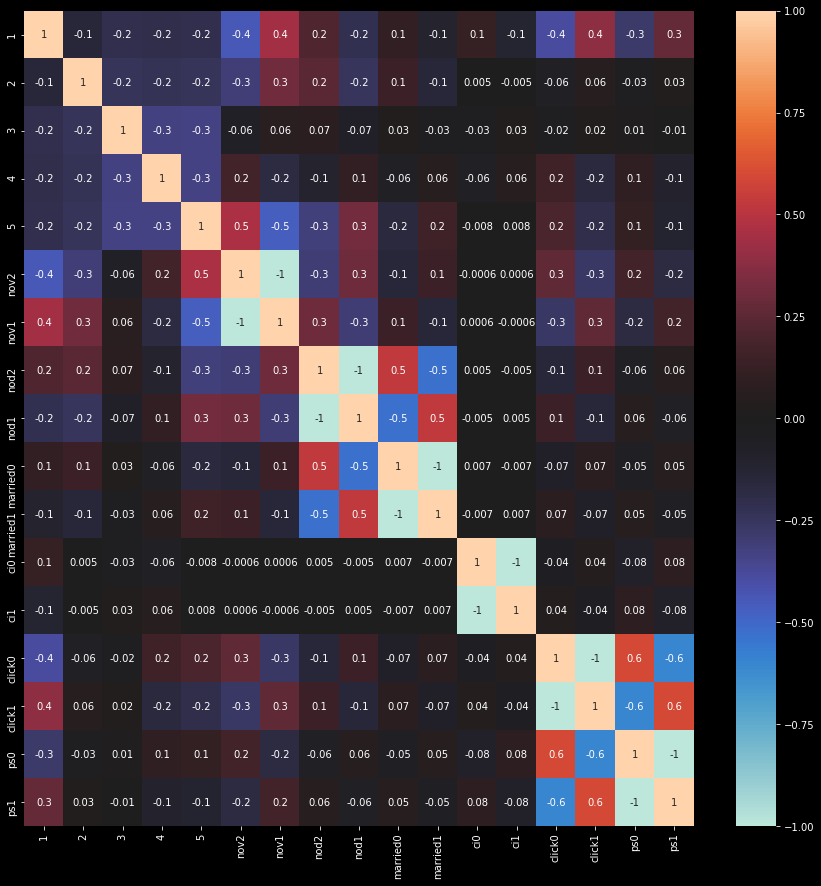

In [183]:
df = pd.read_csv("clean.csv", index_col=0)
total_click=0
temp_click=np.zeros(10000)
index=np.zeros(10000)
for i in np.array(range(0,10000,1)):
    total_click=total_click+df.click[i+1]
#    index[i] = i+1
#    temp_click[i]=total_click
#    acme['Clickcount'][i]=total_click
#df['total_count']=temp_click
#df['id']=index
df['1'] = pd.get_dummies(df['rank'])[1]
df['2'] = pd.get_dummies(df['rank'])[2]
df['3'] = pd.get_dummies(df['rank'])[3]
df['4'] = pd.get_dummies(df['rank'])[4]
df['5'] = pd.get_dummies(df['rank'])[5]
df['nov2'] = pd.get_dummies(df['number_of_vehicles'])[2]
df['nov1'] = pd.get_dummies(df['number_of_vehicles'])[1]
df['nod2'] = pd.get_dummies(df['number_of_drivers'])[2]
df['nod1'] = pd.get_dummies(df['number_of_drivers'])[1]
df['married0'] = pd.get_dummies(df['married'])[0]
df['married1'] = pd.get_dummies(df['married'])[1]
df['ci0'] = pd.get_dummies(df['currently_insured'])[0]
df['ci1'] = pd.get_dummies(df['currently_insured'])[1]
df['click0'] = pd.get_dummies(df['click'])[0]
df['click1'] = pd.get_dummies(df['click'])[1]
df['ps0'] = pd.get_dummies(df['policies sold'])[0]
df['ps1'] = pd.get_dummies(df['policies sold'])[1]
df = df.drop('number_of_vehicles',axis=1)
df = df.drop('number_of_drivers',axis=1)
df = df.drop('currently_insured',axis=1)
df = df.drop('married',axis=1)
df = df.drop('click',axis=1)
df = df.drop('policies sold',axis=1)
df = df.drop('rank',axis=1)
df=df.astype('int32')
plt.figure(figsize=(15,15))
X=df.drop(columns=['click0','click1','ps0','ps1'])
y=df[['click0','click1']]
sns.heatmap(df.corr(),annot=True,fmt='.1g', vmin=-1, vmax=1, center= 0)

In [184]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['click','policies sold','rank', 'nov','nod']), df['click'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['click','policies sold','rank', 'nod']), df['click'], test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['click','policies sold','rank', '1','2','3','4','5']), df['click'], test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['click','policies sold','rank', 'total_count']), df['click'], test_size=0.2, random_state=42)

#Prediction for policysold
#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['policies sold','rank']), df['policies sold'], test_size=0.2, random_state=42)

In [189]:
model = Sequential()
model.add(Dense(8, input_dim=len(X_train.columns), activation='sigmoid'))
#model.add(Dense(8, activation='sigmoid'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=[precision_threshold(0.5), recall_threshold(0.5),auroc])
#binary_crossentropy
#precision_threshold(0.5), recall_threshold(0.5)
#keras.metrics.Precision(), keras.metrics.Recall()

In [192]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=20000, batch_size=200)


Train on 8000 samples, validate on 2000 samples
Epoch 1/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3229 - precision: 0.8639 - recall: 0.8635 - auroc: 0.8038 - val_loss: 0.3080 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7854
Epoch 2/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3225 - precision: 0.8623 - recall: 0.8631 - auroc: 0.8055 - val_loss: 0.3104 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7855
Epoch 3/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3226 - precision: 0.8626 - recall: 0.8643 - auroc: 0.8057 - val_loss: 0.3065 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7850
Epoch 4/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3229 - precision: 0.8651 - recall: 0.8655 - auroc: 0.8062 - val_loss: 0.3095 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7854
Epoch 5/20000
8000/8000 [==============================]

8000/8000 [==============================] - 0s 24us/step - loss: 0.3228 - precision: 0.8649 - recall: 0.8629 - auroc: 0.8057 - val_loss: 0.3090 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7855
Epoch 38/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3227 - precision: 0.8637 - recall: 0.8634 - auroc: 0.8062 - val_loss: 0.3084 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7859
Epoch 39/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3227 - precision: 0.8665 - recall: 0.8639 - auroc: 0.8078 - val_loss: 0.3060 - val_precision: 0.8740 - val_recall: 0.8740 - val_auroc: 0.7856
Epoch 40/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3225 - precision: 0.8631 - recall: 0.8629 - auroc: 0.8081 - val_loss: 0.3058 - val_precision: 0.8725 - val_recall: 0.8725 - val_auroc: 0.7848
Epoch 41/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3228 - precision: 0.8635 - recal

8000/8000 [==============================] - 0s 24us/step - loss: 0.3222 - precision: 0.8645 - recall: 0.8625 - auroc: 0.8046 - val_loss: 0.3098 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7856
Epoch 74/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3225 - precision: 0.8653 - recall: 0.8634 - auroc: 0.8058 - val_loss: 0.3060 - val_precision: 0.8837 - val_recall: 0.8590 - val_auroc: 0.7852
Epoch 75/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3225 - precision: 0.8640 - recall: 0.8624 - auroc: 0.8046 - val_loss: 0.3084 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7843
Epoch 76/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3226 - precision: 0.8639 - recall: 0.8633 - auroc: 0.8066 - val_loss: 0.3092 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7846
Epoch 77/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3226 - precision: 0.8622 - recal

8000/8000 [==============================] - 0s 25us/step - loss: 0.3223 - precision: 0.8649 - recall: 0.8662 - auroc: 0.8073 - val_loss: 0.3077 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7843
Epoch 110/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3222 - precision: 0.8639 - recall: 0.8665 - auroc: 0.8068 - val_loss: 0.3068 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 111/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3224 - precision: 0.8638 - recall: 0.8651 - auroc: 0.8068 - val_loss: 0.3068 - val_precision: 0.8842 - val_recall: 0.8535 - val_auroc: 0.7840
Epoch 112/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3224 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8053 - val_loss: 0.3061 - val_precision: 0.8837 - val_recall: 0.8590 - val_auroc: 0.7841
Epoch 113/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3225 - precision: 0.8634 - r

8000/8000 [==============================] - 0s 23us/step - loss: 0.3222 - precision: 0.8649 - recall: 0.8635 - auroc: 0.8052 - val_loss: 0.3083 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7852
Epoch 146/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3223 - precision: 0.8662 - recall: 0.8646 - auroc: 0.8067 - val_loss: 0.3098 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7861
Epoch 147/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3223 - precision: 0.8646 - recall: 0.8636 - auroc: 0.8045 - val_loss: 0.3099 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7859
Epoch 148/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3226 - precision: 0.8630 - recall: 0.8646 - auroc: 0.8079 - val_loss: 0.3066 - val_precision: 0.8842 - val_recall: 0.8535 - val_auroc: 0.7853
Epoch 149/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3224 - precision: 0.8631 - r

8000/8000 [==============================] - 0s 26us/step - loss: 0.3222 - precision: 0.8628 - recall: 0.8640 - auroc: 0.8068 - val_loss: 0.3066 - val_precision: 0.8740 - val_recall: 0.8740 - val_auroc: 0.7857
Epoch 182/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3224 - precision: 0.8647 - recall: 0.8639 - auroc: 0.8057 - val_loss: 0.3087 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7860
Epoch 183/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3226 - precision: 0.8645 - recall: 0.8651 - auroc: 0.8075 - val_loss: 0.3072 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 184/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3222 - precision: 0.8638 - recall: 0.8662 - auroc: 0.8049 - val_loss: 0.3065 - val_precision: 0.8740 - val_recall: 0.8740 - val_auroc: 0.7859
Epoch 185/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3223 - precision: 0.8655 - r

8000/8000 [==============================] - 0s 29us/step - loss: 0.3224 - precision: 0.8634 - recall: 0.8654 - auroc: 0.8057 - val_loss: 0.3064 - val_precision: 0.8801 - val_recall: 0.8665 - val_auroc: 0.7856
Epoch 218/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3222 - precision: 0.8646 - recall: 0.8639 - auroc: 0.8081 - val_loss: 0.3075 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 219/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3223 - precision: 0.8633 - recall: 0.8606 - auroc: 0.8078 - val_loss: 0.3076 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7849
Epoch 220/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3223 - precision: 0.8642 - recall: 0.8646 - auroc: 0.8075 - val_loss: 0.3077 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7849
Epoch 221/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3221 - precision: 0.8631 - r

8000/8000 [==============================] - 0s 31us/step - loss: 0.3219 - precision: 0.8652 - recall: 0.8618 - auroc: 0.8076 - val_loss: 0.3063 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7855
Epoch 254/20000
8000/8000 [==============================] - 0s 36us/step - loss: 0.3220 - precision: 0.8686 - recall: 0.8609 - auroc: 0.8071 - val_loss: 0.3076 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7867
Epoch 255/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3223 - precision: 0.8637 - recall: 0.8654 - auroc: 0.8096 - val_loss: 0.3082 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7869
Epoch 256/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3222 - precision: 0.8627 - recall: 0.8627 - auroc: 0.8064 - val_loss: 0.3069 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7867
Epoch 257/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3224 - precision: 0.8642 - r

8000/8000 [==============================] - 0s 26us/step - loss: 0.3221 - precision: 0.8646 - recall: 0.8639 - auroc: 0.8077 - val_loss: 0.3079 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7873
Epoch 290/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3223 - precision: 0.8671 - recall: 0.8659 - auroc: 0.8114 - val_loss: 0.3084 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7879
Epoch 291/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3224 - precision: 0.8625 - recall: 0.8629 - auroc: 0.8125 - val_loss: 0.3084 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7876
Epoch 292/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3223 - precision: 0.8638 - recall: 0.8605 - auroc: 0.8088 - val_loss: 0.3071 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7872
Epoch 293/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3221 - precision: 0.8642 - r

8000/8000 [==============================] - 0s 26us/step - loss: 0.3221 - precision: 0.8649 - recall: 0.8594 - auroc: 0.8085 - val_loss: 0.3074 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7876
Epoch 326/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3222 - precision: 0.8645 - recall: 0.8641 - auroc: 0.8096 - val_loss: 0.3083 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7876
Epoch 327/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3221 - precision: 0.8642 - recall: 0.8630 - auroc: 0.8094 - val_loss: 0.3102 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7876
Epoch 328/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3220 - precision: 0.8650 - recall: 0.8618 - auroc: 0.8071 - val_loss: 0.3078 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7874
Epoch 329/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3221 - precision: 0.8635 - r

8000/8000 [==============================] - 0s 24us/step - loss: 0.3220 - precision: 0.8633 - recall: 0.8614 - auroc: 0.8108 - val_loss: 0.3065 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7879
Epoch 362/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3219 - precision: 0.8647 - recall: 0.8644 - auroc: 0.8083 - val_loss: 0.3066 - val_precision: 0.8740 - val_recall: 0.8740 - val_auroc: 0.7884
Epoch 363/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3220 - precision: 0.8642 - recall: 0.8617 - auroc: 0.8091 - val_loss: 0.3069 - val_precision: 0.8842 - val_recall: 0.8535 - val_auroc: 0.7883
Epoch 364/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3217 - precision: 0.8652 - recall: 0.8596 - auroc: 0.8087 - val_loss: 0.3068 - val_precision: 0.8842 - val_recall: 0.8535 - val_auroc: 0.7885
Epoch 365/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3219 - precision: 0.8639 - r

8000/8000 [==============================] - 0s 24us/step - loss: 0.3218 - precision: 0.8645 - recall: 0.8641 - auroc: 0.8089 - val_loss: 0.3075 - val_precision: 0.8842 - val_recall: 0.8535 - val_auroc: 0.7878
Epoch 398/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3219 - precision: 0.8663 - recall: 0.8631 - auroc: 0.8088 - val_loss: 0.3074 - val_precision: 0.8842 - val_recall: 0.8535 - val_auroc: 0.7880
Epoch 399/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3218 - precision: 0.8680 - recall: 0.8615 - auroc: 0.8078 - val_loss: 0.3076 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7871
Epoch 400/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3218 - precision: 0.8648 - recall: 0.8652 - auroc: 0.8082 - val_loss: 0.3091 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7859
Epoch 401/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3219 - precision: 0.8626 - r

8000/8000 [==============================] - 0s 24us/step - loss: 0.3217 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8068 - val_loss: 0.3064 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7883
Epoch 434/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3219 - precision: 0.8641 - recall: 0.8614 - auroc: 0.8104 - val_loss: 0.3093 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7867
Epoch 435/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3216 - precision: 0.8665 - recall: 0.8607 - auroc: 0.8073 - val_loss: 0.3100 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7865
Epoch 436/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3219 - precision: 0.8630 - recall: 0.8629 - auroc: 0.8055 - val_loss: 0.3077 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7876
Epoch 437/20000
8000/8000 [==============================] - 0s 33us/step - loss: 0.3218 - precision: 0.8632 - r

8000/8000 [==============================] - 0s 24us/step - loss: 0.3220 - precision: 0.8645 - recall: 0.8640 - auroc: 0.8076 - val_loss: 0.3072 - val_precision: 0.8842 - val_recall: 0.8535 - val_auroc: 0.7878
Epoch 470/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3218 - precision: 0.8634 - recall: 0.8654 - auroc: 0.8110 - val_loss: 0.3062 - val_precision: 0.8843 - val_recall: 0.8595 - val_auroc: 0.7887
Epoch 471/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3218 - precision: 0.8661 - recall: 0.8613 - auroc: 0.8080 - val_loss: 0.3070 - val_precision: 0.8740 - val_recall: 0.8740 - val_auroc: 0.7879
Epoch 472/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3218 - precision: 0.8656 - recall: 0.8607 - auroc: 0.8092 - val_loss: 0.3074 - val_precision: 0.8842 - val_recall: 0.8535 - val_auroc: 0.7874
Epoch 473/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3217 - precision: 0.8649 - r

8000/8000 [==============================] - 0s 24us/step - loss: 0.3218 - precision: 0.8673 - recall: 0.8596 - auroc: 0.8095 - val_loss: 0.3080 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7877
Epoch 506/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3218 - precision: 0.8642 - recall: 0.8632 - auroc: 0.8080 - val_loss: 0.3079 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7878
Epoch 507/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3218 - precision: 0.8652 - recall: 0.8652 - auroc: 0.8104 - val_loss: 0.3081 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7881
Epoch 508/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3216 - precision: 0.8668 - recall: 0.8667 - auroc: 0.8109 - val_loss: 0.3088 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7871
Epoch 509/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3217 - precision: 0.8623 - r

8000/8000 [==============================] - 0s 24us/step - loss: 0.3216 - precision: 0.8656 - recall: 0.8625 - auroc: 0.8087 - val_loss: 0.3074 - val_precision: 0.8842 - val_recall: 0.8535 - val_auroc: 0.7877
Epoch 542/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3217 - precision: 0.8660 - recall: 0.8609 - auroc: 0.8109 - val_loss: 0.3084 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7867
Epoch 543/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3214 - precision: 0.8680 - recall: 0.8619 - auroc: 0.8108 - val_loss: 0.3147 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7859
Epoch 544/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3217 - precision: 0.8630 - recall: 0.8675 - auroc: 0.8065 - val_loss: 0.3069 - val_precision: 0.8842 - val_recall: 0.8535 - val_auroc: 0.7882
Epoch 545/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3218 - precision: 0.8615 - r

8000/8000 [==============================] - 0s 25us/step - loss: 0.3217 - precision: 0.8634 - recall: 0.8626 - auroc: 0.8090 - val_loss: 0.3076 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7875
Epoch 578/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3216 - precision: 0.8672 - recall: 0.8651 - auroc: 0.8106 - val_loss: 0.3068 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7874
Epoch 579/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3216 - precision: 0.8650 - recall: 0.8632 - auroc: 0.8102 - val_loss: 0.3067 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7878
Epoch 580/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3215 - precision: 0.8635 - recall: 0.8608 - auroc: 0.8100 - val_loss: 0.3092 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7853
Epoch 581/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3214 - precision: 0.8619 - r

8000/8000 [==============================] - 0s 24us/step - loss: 0.3217 - precision: 0.8641 - recall: 0.8649 - auroc: 0.8097 - val_loss: 0.3069 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7878
Epoch 614/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3216 - precision: 0.8645 - recall: 0.8634 - auroc: 0.8095 - val_loss: 0.3080 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7870
Epoch 615/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3213 - precision: 0.8623 - recall: 0.8645 - auroc: 0.8104 - val_loss: 0.3064 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7880
Epoch 616/20000
8000/8000 [==============================] - 0s 36us/step - loss: 0.3218 - precision: 0.8660 - recall: 0.8602 - auroc: 0.8103 - val_loss: 0.3072 - val_precision: 0.8842 - val_recall: 0.8535 - val_auroc: 0.7882
Epoch 617/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3213 - precision: 0.8670 - r

8000/8000 [==============================] - 0s 29us/step - loss: 0.3214 - precision: 0.8669 - recall: 0.8649 - auroc: 0.8101 - val_loss: 0.3080 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7882
Epoch 650/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3215 - precision: 0.8640 - recall: 0.8648 - auroc: 0.8093 - val_loss: 0.3076 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7878
Epoch 651/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3215 - precision: 0.8622 - recall: 0.8630 - auroc: 0.8090 - val_loss: 0.3078 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7879
Epoch 652/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3215 - precision: 0.8627 - recall: 0.8609 - auroc: 0.8107 - val_loss: 0.3071 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7881
Epoch 653/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3214 - precision: 0.8628 - r

8000/8000 [==============================] - 0s 24us/step - loss: 0.3213 - precision: 0.8646 - recall: 0.8619 - auroc: 0.8113 - val_loss: 0.3070 - val_precision: 0.8801 - val_recall: 0.8665 - val_auroc: 0.7881
Epoch 686/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3214 - precision: 0.8689 - recall: 0.8606 - auroc: 0.8103 - val_loss: 0.3104 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7861
Epoch 687/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3216 - precision: 0.8636 - recall: 0.8649 - auroc: 0.8076 - val_loss: 0.3082 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7868
Epoch 688/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3212 - precision: 0.8639 - recall: 0.8630 - auroc: 0.8102 - val_loss: 0.3090 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7861
Epoch 689/20000
8000/8000 [==============================] - 0s 34us/step - loss: 0.3215 - precision: 0.8656 - r

8000/8000 [==============================] - 0s 26us/step - loss: 0.3213 - precision: 0.8642 - recall: 0.8613 - auroc: 0.8100 - val_loss: 0.3073 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7881
Epoch 722/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3213 - precision: 0.8657 - recall: 0.8612 - auroc: 0.8075 - val_loss: 0.3085 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7866
Epoch 723/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3213 - precision: 0.8647 - recall: 0.8626 - auroc: 0.8105 - val_loss: 0.3096 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7861
Epoch 724/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3214 - precision: 0.8630 - recall: 0.8664 - auroc: 0.8098 - val_loss: 0.3080 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7866
Epoch 725/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3213 - precision: 0.8641 - r

8000/8000 [==============================] - 0s 26us/step - loss: 0.3214 - precision: 0.8647 - recall: 0.8622 - auroc: 0.8100 - val_loss: 0.3072 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7873
Epoch 758/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3213 - precision: 0.8669 - recall: 0.8600 - auroc: 0.8103 - val_loss: 0.3079 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7876
Epoch 759/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3214 - precision: 0.8666 - recall: 0.8617 - auroc: 0.8097 - val_loss: 0.3086 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7860
Epoch 760/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3214 - precision: 0.8630 - recall: 0.8668 - auroc: 0.8113 - val_loss: 0.3073 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7875
Epoch 761/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3215 - precision: 0.8648 - r

8000/8000 [==============================] - 0s 29us/step - loss: 0.3215 - precision: 0.8652 - recall: 0.8650 - auroc: 0.8098 - val_loss: 0.3078 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7879
Epoch 794/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3213 - precision: 0.8649 - recall: 0.8648 - auroc: 0.8117 - val_loss: 0.3091 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7865
Epoch 795/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3213 - precision: 0.8642 - recall: 0.8620 - auroc: 0.8114 - val_loss: 0.3092 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7862
Epoch 796/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3215 - precision: 0.8643 - recall: 0.8624 - auroc: 0.8091 - val_loss: 0.3085 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7864
Epoch 797/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3214 - precision: 0.8626 - r

8000/8000 [==============================] - 0s 25us/step - loss: 0.3212 - precision: 0.8638 - recall: 0.8640 - auroc: 0.8107 - val_loss: 0.3090 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7864
Epoch 830/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3214 - precision: 0.8639 - recall: 0.8624 - auroc: 0.8082 - val_loss: 0.3093 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7865
Epoch 831/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3213 - precision: 0.8628 - recall: 0.8609 - auroc: 0.8106 - val_loss: 0.3098 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7858
Epoch 832/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3212 - precision: 0.8616 - recall: 0.8623 - auroc: 0.8089 - val_loss: 0.3078 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7879
Epoch 833/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3213 - precision: 0.8628 - r

8000/8000 [==============================] - 0s 27us/step - loss: 0.3212 - precision: 0.8647 - recall: 0.8636 - auroc: 0.8109 - val_loss: 0.3085 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7871
Epoch 866/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3214 - precision: 0.8653 - recall: 0.8646 - auroc: 0.8093 - val_loss: 0.3075 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7876
Epoch 867/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3209 - precision: 0.8656 - recall: 0.8651 - auroc: 0.8105 - val_loss: 0.3077 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7878
Epoch 868/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3212 - precision: 0.8652 - recall: 0.8650 - auroc: 0.8098 - val_loss: 0.3101 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7853
Epoch 869/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3213 - precision: 0.8630 - r

8000/8000 [==============================] - 0s 24us/step - loss: 0.3212 - precision: 0.8634 - recall: 0.8622 - auroc: 0.8100 - val_loss: 0.3080 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7877
Epoch 902/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3212 - precision: 0.8637 - recall: 0.8651 - auroc: 0.8107 - val_loss: 0.3074 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7874
Epoch 903/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3212 - precision: 0.8645 - recall: 0.8647 - auroc: 0.8110 - val_loss: 0.3089 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7866
Epoch 904/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3213 - precision: 0.8645 - recall: 0.8637 - auroc: 0.8113 - val_loss: 0.3069 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7871
Epoch 905/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3212 - precision: 0.8654 - r

8000/8000 [==============================] - 0s 23us/step - loss: 0.3212 - precision: 0.8666 - recall: 0.8626 - auroc: 0.8072 - val_loss: 0.3075 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7875
Epoch 938/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3210 - precision: 0.8649 - recall: 0.8631 - auroc: 0.8122 - val_loss: 0.3107 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7859
Epoch 939/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3212 - precision: 0.8646 - recall: 0.8652 - auroc: 0.8111 - val_loss: 0.3074 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7876
Epoch 940/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3211 - precision: 0.8653 - recall: 0.8635 - auroc: 0.8101 - val_loss: 0.3077 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7877
Epoch 941/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3211 - precision: 0.8640 - r

8000/8000 [==============================] - 0s 24us/step - loss: 0.3212 - precision: 0.8660 - recall: 0.8656 - auroc: 0.8111 - val_loss: 0.3077 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7879
Epoch 974/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3210 - precision: 0.8641 - recall: 0.8638 - auroc: 0.8113 - val_loss: 0.3074 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7876
Epoch 975/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3213 - precision: 0.8676 - recall: 0.8602 - auroc: 0.8130 - val_loss: 0.3086 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7875
Epoch 976/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3211 - precision: 0.8656 - recall: 0.8632 - auroc: 0.8107 - val_loss: 0.3092 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7875
Epoch 977/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3211 - precision: 0.8652 - r

8000/8000 [==============================] - 0s 26us/step - loss: 0.3212 - precision: 0.8638 - recall: 0.8608 - auroc: 0.8085 - val_loss: 0.3090 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7869
Epoch 1010/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3209 - precision: 0.8660 - recall: 0.8632 - auroc: 0.8094 - val_loss: 0.3073 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7875
Epoch 1011/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3213 - precision: 0.8653 - recall: 0.8626 - auroc: 0.8106 - val_loss: 0.3076 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7874
Epoch 1012/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3212 - precision: 0.8642 - recall: 0.8636 - auroc: 0.8124 - val_loss: 0.3083 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7875
Epoch 1013/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3212 - precision: 0.8651

8000/8000 [==============================] - 0s 24us/step - loss: 0.3211 - precision: 0.8645 - recall: 0.8607 - auroc: 0.8102 - val_loss: 0.3079 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7875
Epoch 1046/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3211 - precision: 0.8659 - recall: 0.8620 - auroc: 0.8129 - val_loss: 0.3092 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7867
Epoch 1047/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3210 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8101 - val_loss: 0.3083 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7876
Epoch 1048/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3211 - precision: 0.8623 - recall: 0.8621 - auroc: 0.8107 - val_loss: 0.3092 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7864
Epoch 1049/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3211 - precision: 0.8655

8000/8000 [==============================] - 0s 26us/step - loss: 0.3209 - precision: 0.8636 - recall: 0.8640 - auroc: 0.8101 - val_loss: 0.3072 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7867
Epoch 1082/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3212 - precision: 0.8641 - recall: 0.8610 - auroc: 0.8108 - val_loss: 0.3080 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7876
Epoch 1083/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3210 - precision: 0.8640 - recall: 0.8625 - auroc: 0.8114 - val_loss: 0.3076 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7873
Epoch 1084/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3212 - precision: 0.8640 - recall: 0.8635 - auroc: 0.8128 - val_loss: 0.3075 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7869
Epoch 1085/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3209 - precision: 0.8658

8000/8000 [==============================] - 0s 24us/step - loss: 0.3211 - precision: 0.8664 - recall: 0.8656 - auroc: 0.8108 - val_loss: 0.3093 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 1118/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3212 - precision: 0.8644 - recall: 0.8624 - auroc: 0.8134 - val_loss: 0.3081 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7875
Epoch 1119/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3210 - precision: 0.8638 - recall: 0.8649 - auroc: 0.8067 - val_loss: 0.3079 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7871
Epoch 1120/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3211 - precision: 0.8663 - recall: 0.8651 - auroc: 0.8093 - val_loss: 0.3082 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7873
Epoch 1121/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3209 - precision: 0.8666

8000/8000 [==============================] - 0s 23us/step - loss: 0.3210 - precision: 0.8631 - recall: 0.8636 - auroc: 0.8123 - val_loss: 0.3092 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 1154/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3209 - precision: 0.8660 - recall: 0.8670 - auroc: 0.8124 - val_loss: 0.3101 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7860
Epoch 1155/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3210 - precision: 0.8638 - recall: 0.8641 - auroc: 0.8126 - val_loss: 0.3085 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7873
Epoch 1156/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3210 - precision: 0.8657 - recall: 0.8624 - auroc: 0.8113 - val_loss: 0.3079 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7869
Epoch 1157/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3209 - precision: 0.8638

8000/8000 [==============================] - 0s 23us/step - loss: 0.3210 - precision: 0.8646 - recall: 0.8634 - auroc: 0.8104 - val_loss: 0.3083 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7867
Epoch 1190/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3210 - precision: 0.8633 - recall: 0.8649 - auroc: 0.8103 - val_loss: 0.3083 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7874
Epoch 1191/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3207 - precision: 0.8634 - recall: 0.8649 - auroc: 0.8110 - val_loss: 0.3092 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7860
Epoch 1192/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3210 - precision: 0.8637 - recall: 0.8640 - auroc: 0.8125 - val_loss: 0.3097 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7862
Epoch 1193/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3210 - precision: 0.8637

8000/8000 [==============================] - 0s 23us/step - loss: 0.3209 - precision: 0.8640 - recall: 0.8625 - auroc: 0.8120 - val_loss: 0.3086 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 1226/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8644 - recall: 0.8639 - auroc: 0.8110 - val_loss: 0.3080 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7872
Epoch 1227/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3210 - precision: 0.8642 - recall: 0.8640 - auroc: 0.8119 - val_loss: 0.3092 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7864
Epoch 1228/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3208 - precision: 0.8666 - recall: 0.8634 - auroc: 0.8126 - val_loss: 0.3110 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7841
Epoch 1229/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8643

8000/8000 [==============================] - 0s 24us/step - loss: 0.3209 - precision: 0.8639 - recall: 0.8620 - auroc: 0.8132 - val_loss: 0.3109 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7856
Epoch 1262/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3209 - precision: 0.8644 - recall: 0.8661 - auroc: 0.8125 - val_loss: 0.3080 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7869
Epoch 1263/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3208 - precision: 0.8636 - recall: 0.8633 - auroc: 0.8094 - val_loss: 0.3088 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 1264/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3208 - precision: 0.8649 - recall: 0.8641 - auroc: 0.8117 - val_loss: 0.3113 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7848
Epoch 1265/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3212 - precision: 0.8645

8000/8000 [==============================] - 0s 22us/step - loss: 0.3208 - precision: 0.8628 - recall: 0.8647 - auroc: 0.8091 - val_loss: 0.3089 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7864
Epoch 1298/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3209 - precision: 0.8637 - recall: 0.8638 - auroc: 0.8094 - val_loss: 0.3105 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7852
Epoch 1299/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3208 - precision: 0.8642 - recall: 0.8650 - auroc: 0.8087 - val_loss: 0.3090 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7862
Epoch 1300/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3208 - precision: 0.8660 - recall: 0.8639 - auroc: 0.8112 - val_loss: 0.3082 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7867
Epoch 1301/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3208 - precision: 0.8629

8000/8000 [==============================] - 0s 22us/step - loss: 0.3208 - precision: 0.8638 - recall: 0.8643 - auroc: 0.8110 - val_loss: 0.3086 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7870
Epoch 1334/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3208 - precision: 0.8642 - recall: 0.8661 - auroc: 0.8100 - val_loss: 0.3082 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7862
Epoch 1335/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3208 - precision: 0.8642 - recall: 0.8645 - auroc: 0.8075 - val_loss: 0.3087 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7860
Epoch 1336/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3209 - precision: 0.8646 - recall: 0.8638 - auroc: 0.8111 - val_loss: 0.3090 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7863
Epoch 1337/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3208 - precision: 0.8650

8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8647 - recall: 0.8651 - auroc: 0.8107 - val_loss: 0.3102 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 1370/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8635 - recall: 0.8642 - auroc: 0.8142 - val_loss: 0.3110 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7854
Epoch 1371/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3209 - precision: 0.8644 - recall: 0.8646 - auroc: 0.8102 - val_loss: 0.3086 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7868
Epoch 1372/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3207 - precision: 0.8648 - recall: 0.8639 - auroc: 0.8112 - val_loss: 0.3086 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7860
Epoch 1373/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3207 - precision: 0.8645

8000/8000 [==============================] - 0s 24us/step - loss: 0.3209 - precision: 0.8630 - recall: 0.8640 - auroc: 0.8112 - val_loss: 0.3086 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7852
Epoch 1406/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3208 - precision: 0.8631 - recall: 0.8637 - auroc: 0.8120 - val_loss: 0.3080 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7866
Epoch 1407/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3208 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8091 - val_loss: 0.3084 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7859
Epoch 1408/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3209 - precision: 0.8653 - recall: 0.8650 - auroc: 0.8127 - val_loss: 0.3083 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7867
Epoch 1409/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3209 - precision: 0.8650

8000/8000 [==============================] - 0s 25us/step - loss: 0.3209 - precision: 0.8639 - recall: 0.8644 - auroc: 0.8120 - val_loss: 0.3103 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 1442/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3206 - precision: 0.8637 - recall: 0.8635 - auroc: 0.8101 - val_loss: 0.3086 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7871
Epoch 1443/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3208 - precision: 0.8646 - recall: 0.8643 - auroc: 0.8121 - val_loss: 0.3110 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7852
Epoch 1444/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3209 - precision: 0.8642 - recall: 0.8646 - auroc: 0.8091 - val_loss: 0.3081 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7870
Epoch 1445/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8629

8000/8000 [==============================] - 0s 22us/step - loss: 0.3208 - precision: 0.8639 - recall: 0.8638 - auroc: 0.8117 - val_loss: 0.3088 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7868
Epoch 1478/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8103 - val_loss: 0.3098 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7862
Epoch 1479/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3208 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8112 - val_loss: 0.3089 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 1480/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8654 - recall: 0.8661 - auroc: 0.8125 - val_loss: 0.3098 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7863
Epoch 1481/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3205 - precision: 0.8644

8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8646 - recall: 0.8634 - auroc: 0.8106 - val_loss: 0.3105 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 1514/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3208 - precision: 0.8658 - recall: 0.8663 - auroc: 0.8122 - val_loss: 0.3086 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7856
Epoch 1515/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8637 - recall: 0.8636 - auroc: 0.8106 - val_loss: 0.3084 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7849
Epoch 1516/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8641 - recall: 0.8635 - auroc: 0.8101 - val_loss: 0.3090 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7860
Epoch 1517/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8648

8000/8000 [==============================] - 0s 24us/step - loss: 0.3206 - precision: 0.8632 - recall: 0.8631 - auroc: 0.8094 - val_loss: 0.3107 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7854
Epoch 1550/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8629 - recall: 0.8643 - auroc: 0.8105 - val_loss: 0.3088 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7868
Epoch 1551/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8639 - recall: 0.8644 - auroc: 0.8117 - val_loss: 0.3101 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7879
Epoch 1552/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8650 - recall: 0.8643 - auroc: 0.8097 - val_loss: 0.3088 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7867
Epoch 1553/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3208 - precision: 0.8644

8000/8000 [==============================] - 0s 26us/step - loss: 0.3206 - precision: 0.8652 - recall: 0.8644 - auroc: 0.8116 - val_loss: 0.3088 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7860
Epoch 1586/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8644 - recall: 0.8635 - auroc: 0.8113 - val_loss: 0.3102 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 1587/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3208 - precision: 0.8631 - recall: 0.8624 - auroc: 0.8107 - val_loss: 0.3100 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 1588/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3207 - precision: 0.8636 - recall: 0.8622 - auroc: 0.8114 - val_loss: 0.3101 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7861
Epoch 1589/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3208 - precision: 0.8656

8000/8000 [==============================] - 0s 24us/step - loss: 0.3205 - precision: 0.8664 - recall: 0.8670 - auroc: 0.8124 - val_loss: 0.3110 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7839
Epoch 1622/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3207 - precision: 0.8620 - recall: 0.8624 - auroc: 0.8108 - val_loss: 0.3091 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7872
Epoch 1623/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3205 - precision: 0.8642 - recall: 0.8649 - auroc: 0.8082 - val_loss: 0.3106 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7849
Epoch 1624/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3208 - precision: 0.8619 - recall: 0.8642 - auroc: 0.8104 - val_loss: 0.3086 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7872
Epoch 1625/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8642

8000/8000 [==============================] - 0s 26us/step - loss: 0.3206 - precision: 0.8646 - recall: 0.8645 - auroc: 0.8128 - val_loss: 0.3088 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7854
Epoch 1658/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8097 - val_loss: 0.3098 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 1659/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8633 - recall: 0.8633 - auroc: 0.8134 - val_loss: 0.3132 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7833
Epoch 1660/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3208 - precision: 0.8635 - recall: 0.8645 - auroc: 0.8092 - val_loss: 0.3093 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7873
Epoch 1661/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8644

8000/8000 [==============================] - 0s 25us/step - loss: 0.3207 - precision: 0.8625 - recall: 0.8643 - auroc: 0.8128 - val_loss: 0.3094 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 1694/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8620 - recall: 0.8628 - auroc: 0.8112 - val_loss: 0.3101 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7875
Epoch 1695/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3202 - precision: 0.8631 - recall: 0.8661 - auroc: 0.8108 - val_loss: 0.3082 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7869
Epoch 1696/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3207 - precision: 0.8630 - recall: 0.8640 - auroc: 0.8116 - val_loss: 0.3098 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7875
Epoch 1697/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8609

8000/8000 [==============================] - 0s 23us/step - loss: 0.3206 - precision: 0.8654 - recall: 0.8659 - auroc: 0.8131 - val_loss: 0.3095 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7865
Epoch 1730/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3204 - precision: 0.8627 - recall: 0.8653 - auroc: 0.8115 - val_loss: 0.3111 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7840
Epoch 1731/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8625 - recall: 0.8673 - auroc: 0.8103 - val_loss: 0.3089 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7855
Epoch 1732/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3205 - precision: 0.8633 - recall: 0.8644 - auroc: 0.8128 - val_loss: 0.3092 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7857
Epoch 1733/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8641

8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8612 - recall: 0.8629 - auroc: 0.8115 - val_loss: 0.3089 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7854
Epoch 1766/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3206 - precision: 0.8643 - recall: 0.8645 - auroc: 0.8115 - val_loss: 0.3086 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7864
Epoch 1767/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8630 - recall: 0.8652 - auroc: 0.8110 - val_loss: 0.3116 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7840
Epoch 1768/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8624 - recall: 0.8635 - auroc: 0.8103 - val_loss: 0.3110 - val_precision: 0.8640 - val_recall: 0.8765 - val_auroc: 0.7845
Epoch 1769/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3208 - precision: 0.8637

8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8638 - recall: 0.8638 - auroc: 0.8111 - val_loss: 0.3095 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 1802/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3207 - precision: 0.8638 - recall: 0.8640 - auroc: 0.8120 - val_loss: 0.3095 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7861
Epoch 1803/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8646 - recall: 0.8644 - auroc: 0.8122 - val_loss: 0.3090 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7859
Epoch 1804/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3204 - precision: 0.8616 - recall: 0.8646 - auroc: 0.8120 - val_loss: 0.3128 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7837
Epoch 1805/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3207 - precision: 0.8654

8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8626 - recall: 0.8645 - auroc: 0.8126 - val_loss: 0.3099 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 1838/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8637 - recall: 0.8660 - auroc: 0.8127 - val_loss: 0.3094 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7872
Epoch 1839/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3206 - precision: 0.8645 - recall: 0.8655 - auroc: 0.8095 - val_loss: 0.3097 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7871
Epoch 1840/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8640 - recall: 0.8654 - auroc: 0.8116 - val_loss: 0.3091 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7871
Epoch 1841/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8641

8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8650 - recall: 0.8646 - auroc: 0.8097 - val_loss: 0.3107 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 1874/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3208 - precision: 0.8645 - recall: 0.8652 - auroc: 0.8123 - val_loss: 0.3097 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7869
Epoch 1875/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3206 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8127 - val_loss: 0.3095 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7854
Epoch 1876/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3205 - precision: 0.8651 - recall: 0.8659 - auroc: 0.8103 - val_loss: 0.3087 - val_precision: 0.8570 - val_recall: 0.8810 - val_auroc: 0.7851
Epoch 1877/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3206 - precision: 0.8629

8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8129 - val_loss: 0.3109 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 1910/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3203 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8121 - val_loss: 0.3091 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7863
Epoch 1911/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3206 - precision: 0.8636 - recall: 0.8649 - auroc: 0.8150 - val_loss: 0.3104 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 1912/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8109 - val_loss: 0.3102 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 1913/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8641

8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8642 - recall: 0.8643 - auroc: 0.8126 - val_loss: 0.3094 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7854
Epoch 1946/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8133 - val_loss: 0.3102 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 1947/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3204 - precision: 0.8631 - recall: 0.8634 - auroc: 0.8111 - val_loss: 0.3106 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7861
Epoch 1948/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8651 - recall: 0.8655 - auroc: 0.8132 - val_loss: 0.3108 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7873
Epoch 1949/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8646

8000/8000 [==============================] - 0s 23us/step - loss: 0.3206 - precision: 0.8643 - recall: 0.8648 - auroc: 0.8112 - val_loss: 0.3115 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 1982/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8632 - recall: 0.8646 - auroc: 0.8120 - val_loss: 0.3090 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7868
Epoch 1983/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3206 - precision: 0.8627 - recall: 0.8639 - auroc: 0.8129 - val_loss: 0.3102 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 1984/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3205 - precision: 0.8638 - recall: 0.8645 - auroc: 0.8126 - val_loss: 0.3102 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 1985/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8645

8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8637 - recall: 0.8637 - auroc: 0.8114 - val_loss: 0.3097 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 2018/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8646 - recall: 0.8651 - auroc: 0.8125 - val_loss: 0.3090 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7855
Epoch 2019/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3205 - precision: 0.8638 - recall: 0.8644 - auroc: 0.8134 - val_loss: 0.3098 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 2020/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3207 - precision: 0.8634 - recall: 0.8634 - auroc: 0.8133 - val_loss: 0.3095 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7856
Epoch 2021/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3205 - precision: 0.8627

8000/8000 [==============================] - 0s 23us/step - loss: 0.3206 - precision: 0.8634 - recall: 0.8634 - auroc: 0.8116 - val_loss: 0.3098 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7855
Epoch 2054/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3205 - precision: 0.8634 - recall: 0.8634 - auroc: 0.8111 - val_loss: 0.3095 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7853
Epoch 2055/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8636 - recall: 0.8650 - auroc: 0.8102 - val_loss: 0.3110 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 2056/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8649 - recall: 0.8662 - auroc: 0.8123 - val_loss: 0.3117 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7850
Epoch 2057/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3205 - precision: 0.8641

8000/8000 [==============================] - 0s 24us/step - loss: 0.3204 - precision: 0.8640 - recall: 0.8651 - auroc: 0.8105 - val_loss: 0.3104 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 2090/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3206 - precision: 0.8654 - recall: 0.8639 - auroc: 0.8103 - val_loss: 0.3096 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7852
Epoch 2091/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8639 - recall: 0.8643 - auroc: 0.8121 - val_loss: 0.3113 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 2092/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3206 - precision: 0.8659 - recall: 0.8641 - auroc: 0.8127 - val_loss: 0.3101 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7865
Epoch 2093/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3204 - precision: 0.8622

8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8634 - recall: 0.8641 - auroc: 0.8117 - val_loss: 0.3104 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 2126/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8116 - val_loss: 0.3099 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7867
Epoch 2127/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3205 - precision: 0.8642 - recall: 0.8630 - auroc: 0.8138 - val_loss: 0.3109 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 2128/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8638 - recall: 0.8642 - auroc: 0.8143 - val_loss: 0.3111 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 2129/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8658

8000/8000 [==============================] - 0s 22us/step - loss: 0.3207 - precision: 0.8656 - recall: 0.8656 - auroc: 0.8138 - val_loss: 0.3102 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7868
Epoch 2162/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8636 - recall: 0.8636 - auroc: 0.8119 - val_loss: 0.3113 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 2163/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3205 - precision: 0.8651 - recall: 0.8655 - auroc: 0.8103 - val_loss: 0.3103 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 2164/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8649 - recall: 0.8644 - auroc: 0.8111 - val_loss: 0.3098 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7852
Epoch 2165/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3203 - precision: 0.8653

8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8637 - recall: 0.8652 - auroc: 0.8127 - val_loss: 0.3098 - val_precision: 0.8776 - val_recall: 0.8530 - val_auroc: 0.7861
Epoch 2198/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3206 - precision: 0.8657 - recall: 0.8635 - auroc: 0.8102 - val_loss: 0.3102 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 2199/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3205 - precision: 0.8648 - recall: 0.8655 - auroc: 0.8099 - val_loss: 0.3106 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 2200/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3204 - precision: 0.8650 - recall: 0.8640 - auroc: 0.8101 - val_loss: 0.3098 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7858
Epoch 2201/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3205 - precision: 0.8643

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8649 - auroc: 0.8101 - val_loss: 0.3090 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7880
Epoch 2234/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3206 - precision: 0.8634 - recall: 0.8640 - auroc: 0.8116 - val_loss: 0.3111 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 2235/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3206 - precision: 0.8659 - recall: 0.8647 - auroc: 0.8127 - val_loss: 0.3096 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7852
Epoch 2236/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8120 - val_loss: 0.3092 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7869
Epoch 2237/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3205 - precision: 0.8642

8000/8000 [==============================] - 0s 22us/step - loss: 0.3208 - precision: 0.8627 - recall: 0.8634 - auroc: 0.8126 - val_loss: 0.3103 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7862
Epoch 2270/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8643 - recall: 0.8639 - auroc: 0.8122 - val_loss: 0.3119 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 2271/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8656 - recall: 0.8652 - auroc: 0.8123 - val_loss: 0.3097 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7859
Epoch 2272/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8102 - val_loss: 0.3101 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 2273/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3205 - precision: 0.8660 - recall: 0.8664 - auroc: 0.8119 - val_loss: 0.3111 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 2306/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8632 - recall: 0.8635 - auroc: 0.8103 - val_loss: 0.3100 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 2307/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8651 - recall: 0.8648 - auroc: 0.8109 - val_loss: 0.3102 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 2308/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8657 - recall: 0.8624 - auroc: 0.8110 - val_loss: 0.3114 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 2309/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8639

8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8646 - recall: 0.8630 - auroc: 0.8104 - val_loss: 0.3104 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 2342/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8650 - recall: 0.8637 - auroc: 0.8118 - val_loss: 0.3110 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 2343/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8646 - recall: 0.8638 - auroc: 0.8112 - val_loss: 0.3107 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 2344/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3204 - precision: 0.8655 - recall: 0.8653 - auroc: 0.8126 - val_loss: 0.3104 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7861
Epoch 2345/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8649

8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8636 - recall: 0.8637 - auroc: 0.8127 - val_loss: 0.3106 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 2378/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3203 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8119 - val_loss: 0.3109 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 2379/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8640 - recall: 0.8643 - auroc: 0.8115 - val_loss: 0.3109 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 2380/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8644 - recall: 0.8640 - auroc: 0.8090 - val_loss: 0.3099 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7851
Epoch 2381/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3205 - precision: 0.8639

8000/8000 [==============================] - 0s 22us/step - loss: 0.3203 - precision: 0.8640 - recall: 0.8629 - auroc: 0.8136 - val_loss: 0.3113 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 2414/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8646 - recall: 0.8651 - auroc: 0.8130 - val_loss: 0.3095 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7852
Epoch 2415/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3206 - precision: 0.8642 - recall: 0.8641 - auroc: 0.8127 - val_loss: 0.3112 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 2416/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3205 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8109 - val_loss: 0.3104 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7853
Epoch 2417/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8644

8000/8000 [==============================] - 0s 23us/step - loss: 0.3203 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8129 - val_loss: 0.3111 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 2450/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3202 - precision: 0.8638 - recall: 0.8619 - auroc: 0.8101 - val_loss: 0.3121 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7860
Epoch 2451/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3205 - precision: 0.8643 - recall: 0.8645 - auroc: 0.8108 - val_loss: 0.3109 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 2452/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3202 - precision: 0.8627 - recall: 0.8624 - auroc: 0.8111 - val_loss: 0.3126 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7849
Epoch 2453/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8648

8000/8000 [==============================] - 0s 24us/step - loss: 0.3205 - precision: 0.8636 - recall: 0.8634 - auroc: 0.8120 - val_loss: 0.3109 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 2486/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3204 - precision: 0.8619 - recall: 0.8614 - auroc: 0.8117 - val_loss: 0.3104 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 2487/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3203 - precision: 0.8642 - recall: 0.8644 - auroc: 0.8098 - val_loss: 0.3099 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7854
Epoch 2488/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3204 - precision: 0.8656 - recall: 0.8656 - auroc: 0.8122 - val_loss: 0.3107 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 2489/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8639

8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8667 - recall: 0.8661 - auroc: 0.8117 - val_loss: 0.3094 - val_precision: 0.8588 - val_recall: 0.8885 - val_auroc: 0.7873
Epoch 2522/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8627 - recall: 0.8651 - auroc: 0.8119 - val_loss: 0.3104 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 2523/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3205 - precision: 0.8626 - recall: 0.8626 - auroc: 0.8117 - val_loss: 0.3116 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 2524/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8646 - recall: 0.8638 - auroc: 0.8119 - val_loss: 0.3105 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 2525/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3204 - precision: 0.8644

8000/8000 [==============================] - 0s 22us/step - loss: 0.3204 - precision: 0.8641 - recall: 0.8644 - auroc: 0.8107 - val_loss: 0.3102 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7848
Epoch 2558/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3203 - precision: 0.8641 - recall: 0.8631 - auroc: 0.8113 - val_loss: 0.3111 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 2559/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8637 - recall: 0.8641 - auroc: 0.8127 - val_loss: 0.3112 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 2560/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3206 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8106 - val_loss: 0.3106 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 2561/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3203 - precision: 0.8651

8000/8000 [==============================] - 0s 23us/step - loss: 0.3203 - precision: 0.8643 - recall: 0.8650 - auroc: 0.8111 - val_loss: 0.3106 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 2594/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3203 - precision: 0.8637 - recall: 0.8637 - auroc: 0.8142 - val_loss: 0.3107 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7862
Epoch 2595/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8654 - recall: 0.8649 - auroc: 0.8109 - val_loss: 0.3120 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 2596/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3203 - precision: 0.8638 - recall: 0.8643 - auroc: 0.8105 - val_loss: 0.3107 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 2597/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3204 - precision: 0.8640

8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8631 - recall: 0.8631 - auroc: 0.8123 - val_loss: 0.3120 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 2630/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3203 - precision: 0.8636 - recall: 0.8646 - auroc: 0.8114 - val_loss: 0.3114 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 2631/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3204 - precision: 0.8641 - recall: 0.8630 - auroc: 0.8133 - val_loss: 0.3106 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 2632/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3205 - precision: 0.8637 - recall: 0.8646 - auroc: 0.8133 - val_loss: 0.3123 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 2633/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3205 - precision: 0.8648

8000/8000 [==============================] - 0s 26us/step - loss: 0.3202 - precision: 0.8645 - recall: 0.8660 - auroc: 0.8113 - val_loss: 0.3113 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 2666/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3203 - precision: 0.8628 - recall: 0.8638 - auroc: 0.8119 - val_loss: 0.3112 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 2667/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3203 - precision: 0.8640 - recall: 0.8650 - auroc: 0.8121 - val_loss: 0.3118 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 2668/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8639 - recall: 0.8641 - auroc: 0.8110 - val_loss: 0.3107 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 2669/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3203 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8648 - auroc: 0.8115 - val_loss: 0.3135 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7829
Epoch 2702/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3204 - precision: 0.8647 - recall: 0.8644 - auroc: 0.8140 - val_loss: 0.3099 - val_precision: 0.8660 - val_recall: 0.8660 - val_auroc: 0.7848
Epoch 2703/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8639 - recall: 0.8631 - auroc: 0.8137 - val_loss: 0.3120 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 2704/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8640 - recall: 0.8648 - auroc: 0.8102 - val_loss: 0.3108 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 2705/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3202 - precision: 0.8637

8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8658 - recall: 0.8665 - auroc: 0.8110 - val_loss: 0.3103 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7854
Epoch 2738/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3203 - precision: 0.8638 - recall: 0.8642 - auroc: 0.8128 - val_loss: 0.3106 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 2739/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3204 - precision: 0.8647 - recall: 0.8640 - auroc: 0.8120 - val_loss: 0.3107 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 2740/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3204 - precision: 0.8643 - recall: 0.8645 - auroc: 0.8137 - val_loss: 0.3111 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 2741/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3204 - precision: 0.8650

8000/8000 [==============================] - 0s 27us/step - loss: 0.3203 - precision: 0.8637 - recall: 0.8644 - auroc: 0.8125 - val_loss: 0.3109 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7852
Epoch 2774/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3204 - precision: 0.8631 - recall: 0.8644 - auroc: 0.8136 - val_loss: 0.3116 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 2775/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3202 - precision: 0.8644 - recall: 0.8640 - auroc: 0.8137 - val_loss: 0.3101 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7867
Epoch 2776/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3203 - precision: 0.8637 - recall: 0.8649 - auroc: 0.8115 - val_loss: 0.3113 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 2777/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3204 - precision: 0.8636

8000/8000 [==============================] - 0s 24us/step - loss: 0.3203 - precision: 0.8645 - recall: 0.8641 - auroc: 0.8121 - val_loss: 0.3111 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 2810/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3203 - precision: 0.8635 - recall: 0.8644 - auroc: 0.8099 - val_loss: 0.3110 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 2811/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8658 - recall: 0.8638 - auroc: 0.8118 - val_loss: 0.3103 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7862
Epoch 2812/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3203 - precision: 0.8632 - recall: 0.8649 - auroc: 0.8141 - val_loss: 0.3127 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 2813/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3204 - precision: 0.8621

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8648 - auroc: 0.8109 - val_loss: 0.3102 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7866
Epoch 2846/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3204 - precision: 0.8637 - recall: 0.8636 - auroc: 0.8126 - val_loss: 0.3117 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 2847/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8645 - recall: 0.8657 - auroc: 0.8113 - val_loss: 0.3104 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7842
Epoch 2848/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3205 - precision: 0.8639 - recall: 0.8631 - auroc: 0.8149 - val_loss: 0.3113 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 2849/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3203 - precision: 0.8638

8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8632 - recall: 0.8649 - auroc: 0.8114 - val_loss: 0.3121 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 2882/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3203 - precision: 0.8633 - recall: 0.8649 - auroc: 0.8105 - val_loss: 0.3119 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 2883/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8641 - recall: 0.8648 - auroc: 0.8094 - val_loss: 0.3110 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7843
Epoch 2884/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8641 - recall: 0.8630 - auroc: 0.8121 - val_loss: 0.3112 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7853
Epoch 2885/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3204 - precision: 0.8641

8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8662 - auroc: 0.8122 - val_loss: 0.3107 - val_precision: 0.8660 - val_recall: 0.8660 - val_auroc: 0.7839
Epoch 2918/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3203 - precision: 0.8642 - recall: 0.8638 - auroc: 0.8129 - val_loss: 0.3109 - val_precision: 0.8660 - val_recall: 0.8660 - val_auroc: 0.7837
Epoch 2919/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3202 - precision: 0.8631 - recall: 0.8643 - auroc: 0.8104 - val_loss: 0.3120 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 2920/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3204 - precision: 0.8667 - recall: 0.8670 - auroc: 0.8118 - val_loss: 0.3122 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 2921/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3203 - precision: 0.8624

8000/8000 [==============================] - 0s 27us/step - loss: 0.3202 - precision: 0.8635 - recall: 0.8641 - auroc: 0.8122 - val_loss: 0.3124 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 2954/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3203 - precision: 0.8640 - recall: 0.8655 - auroc: 0.8121 - val_loss: 0.3114 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 2955/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8642 - recall: 0.8655 - auroc: 0.8129 - val_loss: 0.3106 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7843
Epoch 2956/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3203 - precision: 0.8638 - recall: 0.8641 - auroc: 0.8124 - val_loss: 0.3111 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7842
Epoch 2957/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3204 - precision: 0.8633

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8659 - auroc: 0.8119 - val_loss: 0.3109 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7844
Epoch 2990/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3202 - precision: 0.8633 - recall: 0.8646 - auroc: 0.8111 - val_loss: 0.3119 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 2991/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8634 - auroc: 0.8134 - val_loss: 0.3104 - val_precision: 0.8745 - val_recall: 0.8745 - val_auroc: 0.7870
Epoch 2992/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3203 - precision: 0.8639 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3110 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7842
Epoch 2993/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3204 - precision: 0.8624

8000/8000 [==============================] - 0s 26us/step - loss: 0.3202 - precision: 0.8643 - recall: 0.8645 - auroc: 0.8111 - val_loss: 0.3112 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7842
Epoch 3026/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3203 - precision: 0.8651 - recall: 0.8659 - auroc: 0.8118 - val_loss: 0.3125 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 3027/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3202 - precision: 0.8644 - recall: 0.8656 - auroc: 0.8108 - val_loss: 0.3120 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7860
Epoch 3028/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8634 - recall: 0.8652 - auroc: 0.8097 - val_loss: 0.3111 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7861
Epoch 3029/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3204 - precision: 0.8641 - recall: 0.8659 - auroc: 0.8115 - val_loss: 0.3118 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 3062/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3202 - precision: 0.8646 - recall: 0.8659 - auroc: 0.8132 - val_loss: 0.3130 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 3063/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3203 - precision: 0.8637 - recall: 0.8646 - auroc: 0.8128 - val_loss: 0.3115 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7842
Epoch 3064/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3202 - precision: 0.8631 - recall: 0.8659 - auroc: 0.8111 - val_loss: 0.3112 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7846
Epoch 3065/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3198 - precision: 0.8642

8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8634 - recall: 0.8662 - auroc: 0.8119 - val_loss: 0.3121 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 3098/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8640 - recall: 0.8651 - auroc: 0.8105 - val_loss: 0.3116 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7862
Epoch 3099/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3203 - precision: 0.8639 - recall: 0.8658 - auroc: 0.8130 - val_loss: 0.3124 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 3100/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3202 - precision: 0.8630 - recall: 0.8641 - auroc: 0.8132 - val_loss: 0.3109 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7843
Epoch 3101/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8640

8000/8000 [==============================] - 0s 27us/step - loss: 0.3202 - precision: 0.8637 - recall: 0.8649 - auroc: 0.8124 - val_loss: 0.3112 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7844
Epoch 3134/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8654 - recall: 0.8649 - auroc: 0.8104 - val_loss: 0.3123 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 3135/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8649 - auroc: 0.8109 - val_loss: 0.3112 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7864
Epoch 3136/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8625 - recall: 0.8643 - auroc: 0.8105 - val_loss: 0.3113 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7843
Epoch 3137/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8629

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8645 - auroc: 0.8108 - val_loss: 0.3131 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 3170/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8655 - recall: 0.8656 - auroc: 0.8100 - val_loss: 0.3118 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 3171/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3203 - precision: 0.8639 - recall: 0.8645 - auroc: 0.8135 - val_loss: 0.3112 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7853
Epoch 3172/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8637 - recall: 0.8641 - auroc: 0.8147 - val_loss: 0.3115 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 3173/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3202 - precision: 0.8649

8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8630 - recall: 0.8630 - auroc: 0.8134 - val_loss: 0.3112 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7863
Epoch 3206/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3123 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 3207/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8633 - recall: 0.8647 - auroc: 0.8118 - val_loss: 0.3131 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 3208/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8638 - recall: 0.8644 - auroc: 0.8111 - val_loss: 0.3114 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7846
Epoch 3209/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3203 - precision: 0.8641

8000/8000 [==============================] - 0s 26us/step - loss: 0.3202 - precision: 0.8642 - recall: 0.8642 - auroc: 0.8125 - val_loss: 0.3125 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 3242/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8121 - val_loss: 0.3126 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 3243/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8655 - auroc: 0.8125 - val_loss: 0.3134 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 3244/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3203 - precision: 0.8646 - recall: 0.8651 - auroc: 0.8135 - val_loss: 0.3120 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 3245/20000
8000/8000 [==============================] - 0s 32us/step - loss: 0.3201 - precision: 0.8648

8000/8000 [==============================] - 0s 26us/step - loss: 0.3202 - precision: 0.8639 - recall: 0.8640 - auroc: 0.8117 - val_loss: 0.3118 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7842
Epoch 3278/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8655 - recall: 0.8649 - auroc: 0.8124 - val_loss: 0.3115 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 3279/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8645 - recall: 0.8649 - auroc: 0.8107 - val_loss: 0.3131 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 3280/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8654 - recall: 0.8654 - auroc: 0.8116 - val_loss: 0.3127 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 3281/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8651

8000/8000 [==============================] - 0s 26us/step - loss: 0.3203 - precision: 0.8643 - recall: 0.8649 - auroc: 0.8128 - val_loss: 0.3127 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 3314/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8636 - auroc: 0.8124 - val_loss: 0.3117 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7839
Epoch 3315/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8641 - recall: 0.8652 - auroc: 0.8123 - val_loss: 0.3127 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 3316/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8653 - recall: 0.8653 - auroc: 0.8112 - val_loss: 0.3137 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 3317/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8644

8000/8000 [==============================] - 0s 24us/step - loss: 0.3203 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8144 - val_loss: 0.3118 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7841
Epoch 3350/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3203 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8144 - val_loss: 0.3117 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7840
Epoch 3351/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8647 - auroc: 0.8122 - val_loss: 0.3115 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7841
Epoch 3352/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8660 - auroc: 0.8120 - val_loss: 0.3121 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 3353/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8649

8000/8000 [==============================] - 0s 26us/step - loss: 0.3203 - precision: 0.8632 - recall: 0.8640 - auroc: 0.8120 - val_loss: 0.3129 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 3386/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3202 - precision: 0.8637 - recall: 0.8650 - auroc: 0.8118 - val_loss: 0.3126 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 3387/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3203 - precision: 0.8653 - recall: 0.8653 - auroc: 0.8147 - val_loss: 0.3125 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 3388/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3203 - precision: 0.8631 - recall: 0.8635 - auroc: 0.8122 - val_loss: 0.3123 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 3389/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8645

8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8642 - recall: 0.8651 - auroc: 0.8118 - val_loss: 0.3135 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 3422/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8644 - auroc: 0.8098 - val_loss: 0.3124 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 3423/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8120 - val_loss: 0.3122 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 3424/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3203 - precision: 0.8636 - recall: 0.8636 - auroc: 0.8128 - val_loss: 0.3130 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 3425/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8639

8000/8000 [==============================] - 0s 26us/step - loss: 0.3202 - precision: 0.8644 - recall: 0.8659 - auroc: 0.8115 - val_loss: 0.3123 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 3458/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8645 - auroc: 0.8107 - val_loss: 0.3115 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7855
Epoch 3459/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8633 - recall: 0.8655 - auroc: 0.8103 - val_loss: 0.3122 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 3460/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8650 - auroc: 0.8112 - val_loss: 0.3119 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7853
Epoch 3461/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8643

8000/8000 [==============================] - 0s 27us/step - loss: 0.3203 - precision: 0.8663 - recall: 0.8649 - auroc: 0.8143 - val_loss: 0.3129 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 3494/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8126 - val_loss: 0.3127 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 3495/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8637 - recall: 0.8649 - auroc: 0.8109 - val_loss: 0.3123 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 3496/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8650 - auroc: 0.8128 - val_loss: 0.3141 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 3497/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8646

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8640 - auroc: 0.8127 - val_loss: 0.3120 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7842
Epoch 3530/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3202 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8133 - val_loss: 0.3124 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7829
Epoch 3531/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3203 - precision: 0.8637 - recall: 0.8649 - auroc: 0.8146 - val_loss: 0.3127 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 3532/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8622 - recall: 0.8641 - auroc: 0.8117 - val_loss: 0.3143 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 3533/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8647

8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8638 - recall: 0.8638 - auroc: 0.8106 - val_loss: 0.3123 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7847
Epoch 3566/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8640 - auroc: 0.8110 - val_loss: 0.3118 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7850
Epoch 3567/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8641 - recall: 0.8655 - auroc: 0.8109 - val_loss: 0.3123 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7835
Epoch 3568/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8639 - recall: 0.8650 - auroc: 0.8132 - val_loss: 0.3118 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7847
Epoch 3569/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8637

8000/8000 [==============================] - 0s 27us/step - loss: 0.3202 - precision: 0.8642 - recall: 0.8651 - auroc: 0.8146 - val_loss: 0.3127 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 3602/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8655 - auroc: 0.8109 - val_loss: 0.3143 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 3603/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8643 - recall: 0.8652 - auroc: 0.8131 - val_loss: 0.3130 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 3604/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8119 - val_loss: 0.3123 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7831
Epoch 3605/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8634

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8641 - auroc: 0.8114 - val_loss: 0.3132 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 3638/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8132 - val_loss: 0.3134 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 3639/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8636 - recall: 0.8636 - auroc: 0.8112 - val_loss: 0.3126 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 3640/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8136 - val_loss: 0.3148 - val_precision: 0.8747 - val_recall: 0.8620 - val_auroc: 0.7816
Epoch 3641/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8650

8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8668 - auroc: 0.8132 - val_loss: 0.3127 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 3674/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8648 - auroc: 0.8115 - val_loss: 0.3129 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 3675/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3201 - precision: 0.8642 - recall: 0.8651 - auroc: 0.8112 - val_loss: 0.3127 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 3676/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8648 - auroc: 0.8131 - val_loss: 0.3126 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7827
Epoch 3677/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8628

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8656 - auroc: 0.8119 - val_loss: 0.3131 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 3710/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8627 - recall: 0.8639 - auroc: 0.8127 - val_loss: 0.3136 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 3711/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8666 - auroc: 0.8127 - val_loss: 0.3132 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 3712/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8125 - val_loss: 0.3131 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 3713/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8638

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8648 - auroc: 0.8092 - val_loss: 0.3139 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 3746/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8638 - recall: 0.8642 - auroc: 0.8112 - val_loss: 0.3128 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 3747/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8653 - auroc: 0.8116 - val_loss: 0.3129 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 3748/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8652 - auroc: 0.8127 - val_loss: 0.3127 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 3749/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8653

8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8123 - val_loss: 0.3134 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 3782/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8638 - recall: 0.8638 - auroc: 0.8129 - val_loss: 0.3127 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 3783/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3202 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8134 - val_loss: 0.3125 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 3784/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8645 - recall: 0.8649 - auroc: 0.8111 - val_loss: 0.3126 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7841
Epoch 3785/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8648

8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8651 - auroc: 0.8110 - val_loss: 0.3139 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 3818/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8123 - val_loss: 0.3129 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 3819/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8638 - recall: 0.8643 - auroc: 0.8121 - val_loss: 0.3130 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 3820/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8645 - auroc: 0.8132 - val_loss: 0.3126 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7831
Epoch 3821/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644

8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8122 - val_loss: 0.3138 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 3854/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8646 - recall: 0.8652 - auroc: 0.8111 - val_loss: 0.3133 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 3855/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8645 - auroc: 0.8124 - val_loss: 0.3141 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 3856/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8654 - auroc: 0.8123 - val_loss: 0.3129 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 3857/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3202 - precision: 0.8641

8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8616 - auroc: 0.8126 - val_loss: 0.3131 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 3890/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8651 - auroc: 0.8146 - val_loss: 0.3127 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7846
Epoch 3891/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8642 - recall: 0.8645 - auroc: 0.8131 - val_loss: 0.3133 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 3892/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8125 - val_loss: 0.3133 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 3893/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8645

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8651 - auroc: 0.8109 - val_loss: 0.3135 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 3926/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8646 - recall: 0.8654 - auroc: 0.8132 - val_loss: 0.3144 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7815
Epoch 3927/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8630 - recall: 0.8634 - auroc: 0.8091 - val_loss: 0.3133 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 3928/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8645 - auroc: 0.8107 - val_loss: 0.3133 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 3929/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8656

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8652 - auroc: 0.8108 - val_loss: 0.3125 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7846
Epoch 3962/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8641 - auroc: 0.8125 - val_loss: 0.3131 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 3963/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8650 - auroc: 0.8122 - val_loss: 0.3131 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 3964/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8652 - auroc: 0.8104 - val_loss: 0.3144 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 3965/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8627

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8654 - auroc: 0.8110 - val_loss: 0.3139 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 3998/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8635 - recall: 0.8661 - auroc: 0.8078 - val_loss: 0.3158 - val_precision: 0.8710 - val_recall: 0.8710 - val_auroc: 0.7813
Epoch 3999/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8638 - recall: 0.8639 - auroc: 0.8115 - val_loss: 0.3140 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 4000/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8655 - recall: 0.8644 - auroc: 0.8126 - val_loss: 0.3130 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7829
Epoch 4001/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8631

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8109 - val_loss: 0.3138 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 4034/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8649 - auroc: 0.8131 - val_loss: 0.3131 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 4035/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8630 - recall: 0.8636 - auroc: 0.8130 - val_loss: 0.3138 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 4036/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8649 - auroc: 0.8131 - val_loss: 0.3133 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 4037/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8650

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8634 - auroc: 0.8142 - val_loss: 0.3142 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7810
Epoch 4070/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8649 - auroc: 0.8114 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7809
Epoch 4071/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8121 - val_loss: 0.3129 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7845
Epoch 4072/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8656 - recall: 0.8656 - auroc: 0.8114 - val_loss: 0.3136 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 4073/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8638

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8658 - recall: 0.8658 - auroc: 0.8104 - val_loss: 0.3135 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 4106/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8635 - auroc: 0.8138 - val_loss: 0.3126 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7843
Epoch 4107/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8638 - auroc: 0.8102 - val_loss: 0.3136 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 4108/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8652 - auroc: 0.8105 - val_loss: 0.3135 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 4109/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646

8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8644 - auroc: 0.8116 - val_loss: 0.3143 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 4142/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8639 - auroc: 0.8116 - val_loss: 0.3132 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 4143/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8630 - auroc: 0.8091 - val_loss: 0.3142 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 4144/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8641 - auroc: 0.8131 - val_loss: 0.3132 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 4145/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8638

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8638 - auroc: 0.8120 - val_loss: 0.3129 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7840
Epoch 4178/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8648 - auroc: 0.8132 - val_loss: 0.3138 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 4179/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8121 - val_loss: 0.3149 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 4180/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8643 - auroc: 0.8122 - val_loss: 0.3126 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7844
Epoch 4181/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8639

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8110 - val_loss: 0.3137 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 4214/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8655 - recall: 0.8654 - auroc: 0.8124 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 4215/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8657 - recall: 0.8656 - auroc: 0.8108 - val_loss: 0.3139 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 4216/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8646 - auroc: 0.8123 - val_loss: 0.3129 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7827
Epoch 4217/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8644 - auroc: 0.8106 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 4250/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3202 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8136 - val_loss: 0.3145 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 4251/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8639 - auroc: 0.8104 - val_loss: 0.3144 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 4252/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8638 - auroc: 0.8105 - val_loss: 0.3141 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 4253/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8653

8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8654 - recall: 0.8654 - auroc: 0.8129 - val_loss: 0.3139 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 4286/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8663 - recall: 0.8659 - auroc: 0.8119 - val_loss: 0.3141 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 4287/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3138 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 4288/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8142 - val_loss: 0.3131 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7841
Epoch 4289/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8655

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8134 - val_loss: 0.3138 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 4322/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8636 - auroc: 0.8115 - val_loss: 0.3146 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 4323/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8655 - auroc: 0.8128 - val_loss: 0.3134 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7829
Epoch 4324/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8632 - recall: 0.8636 - auroc: 0.8108 - val_loss: 0.3135 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7816
Epoch 4325/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8644

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8642 - auroc: 0.8120 - val_loss: 0.3143 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 4358/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8638 - recall: 0.8636 - auroc: 0.8108 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7815
Epoch 4359/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8126 - val_loss: 0.3144 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 4360/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8641 - auroc: 0.8124 - val_loss: 0.3136 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 4361/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647

8000/8000 [==============================] - 0s 24us/step - loss: 0.3202 - precision: 0.8652 - recall: 0.8637 - auroc: 0.8148 - val_loss: 0.3132 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7827
Epoch 4394/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8636 - auroc: 0.8125 - val_loss: 0.3133 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7825
Epoch 4395/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8637 - auroc: 0.8121 - val_loss: 0.3135 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 4396/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8656 - recall: 0.8656 - auroc: 0.8116 - val_loss: 0.3140 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 4397/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641

8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8645 - recall: 0.8643 - auroc: 0.8099 - val_loss: 0.3130 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7845
Epoch 4430/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8657 - recall: 0.8646 - auroc: 0.8120 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 4431/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3201 - precision: 0.8653 - recall: 0.8650 - auroc: 0.8101 - val_loss: 0.3137 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 4432/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8642 - auroc: 0.8111 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 4433/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8638

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8642 - auroc: 0.8136 - val_loss: 0.3135 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7830
Epoch 4466/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8638 - auroc: 0.8103 - val_loss: 0.3139 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 4467/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8640 - auroc: 0.8138 - val_loss: 0.3139 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 4468/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8109 - val_loss: 0.3141 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 4469/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8645 - auroc: 0.8125 - val_loss: 0.3137 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7830
Epoch 4502/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8636 - auroc: 0.8135 - val_loss: 0.3133 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7842
Epoch 4503/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8639 - auroc: 0.8124 - val_loss: 0.3131 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7846
Epoch 4504/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8649 - auroc: 0.8115 - val_loss: 0.3143 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 4505/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8639

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8636 - auroc: 0.8111 - val_loss: 0.3147 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 4538/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8637 - auroc: 0.8118 - val_loss: 0.3139 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 4539/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8649 - auroc: 0.8107 - val_loss: 0.3137 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7828
Epoch 4540/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8630 - auroc: 0.8108 - val_loss: 0.3136 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7827
Epoch 4541/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8646

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8657 - recall: 0.8641 - auroc: 0.8119 - val_loss: 0.3143 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7810
Epoch 4574/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8085 - val_loss: 0.3135 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7815
Epoch 4575/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8649 - auroc: 0.8124 - val_loss: 0.3140 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 4576/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8639 - auroc: 0.8121 - val_loss: 0.3135 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7825
Epoch 4577/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8656

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8652 - auroc: 0.8108 - val_loss: 0.3146 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 4610/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8123 - val_loss: 0.3140 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 4611/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8649 - auroc: 0.8130 - val_loss: 0.3134 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7845
Epoch 4612/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8667 - recall: 0.8645 - auroc: 0.8128 - val_loss: 0.3144 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 4613/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8651

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8628 - auroc: 0.8134 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 4646/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8630 - auroc: 0.8135 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 4647/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8640 - auroc: 0.8101 - val_loss: 0.3143 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 4648/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8611 - recall: 0.8643 - auroc: 0.8147 - val_loss: 0.3139 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 4649/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8650

8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8125 - val_loss: 0.3141 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 4682/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8655 - recall: 0.8633 - auroc: 0.8116 - val_loss: 0.3137 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7839
Epoch 4683/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3196 - precision: 0.8648 - recall: 0.8632 - auroc: 0.8119 - val_loss: 0.3132 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7844
Epoch 4684/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8142 - val_loss: 0.3145 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 4685/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3201 - precision: 0.8649

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8631 - auroc: 0.8105 - val_loss: 0.3140 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 4718/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3197 - precision: 0.8645 - recall: 0.8639 - auroc: 0.8103 - val_loss: 0.3135 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7836
Epoch 4719/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8631 - recall: 0.8646 - auroc: 0.8114 - val_loss: 0.3145 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 4720/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8646 - auroc: 0.8110 - val_loss: 0.3143 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 4721/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8637

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8625 - auroc: 0.8136 - val_loss: 0.3141 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 4754/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8635 - auroc: 0.8120 - val_loss: 0.3144 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 4755/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8635 - auroc: 0.8112 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 4756/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8132 - val_loss: 0.3146 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 4757/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8646

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8666 - recall: 0.8629 - auroc: 0.8129 - val_loss: 0.3141 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7823
Epoch 4790/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8641 - auroc: 0.8154 - val_loss: 0.3139 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7827
Epoch 4791/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8629 - auroc: 0.8126 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 4792/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8645 - auroc: 0.8127 - val_loss: 0.3141 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7835
Epoch 4793/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8658

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8635 - auroc: 0.8124 - val_loss: 0.3141 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7830
Epoch 4826/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8631 - auroc: 0.8121 - val_loss: 0.3139 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7827
Epoch 4827/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8641 - auroc: 0.8134 - val_loss: 0.3141 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7830
Epoch 4828/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8627 - auroc: 0.8128 - val_loss: 0.3142 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 4829/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8653

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8119 - val_loss: 0.3141 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 4862/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8636 - auroc: 0.8107 - val_loss: 0.3141 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7821
Epoch 4863/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8644 - auroc: 0.8117 - val_loss: 0.3142 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 4864/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8660 - recall: 0.8632 - auroc: 0.8119 - val_loss: 0.3146 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 4865/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8656

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8655 - auroc: 0.8136 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7813
Epoch 4898/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8110 - val_loss: 0.3143 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 4899/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8631 - auroc: 0.8105 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7813
Epoch 4900/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8640 - auroc: 0.8140 - val_loss: 0.3147 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 4901/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8645

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8622 - auroc: 0.8115 - val_loss: 0.3147 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 4934/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8632 - auroc: 0.8117 - val_loss: 0.3140 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7828
Epoch 4935/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3197 - precision: 0.8638 - recall: 0.8644 - auroc: 0.8131 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 4936/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8632 - auroc: 0.8135 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7815
Epoch 4937/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3200 - precision: 0.8652

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8641 - auroc: 0.8116 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 4970/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8660 - recall: 0.8634 - auroc: 0.8136 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 4971/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8636 - auroc: 0.8118 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7813
Epoch 4972/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8122 - val_loss: 0.3142 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7833
Epoch 4973/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8649

8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8635 - recall: 0.8629 - auroc: 0.8117 - val_loss: 0.3137 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7842
Epoch 5006/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8656 - recall: 0.8645 - auroc: 0.8124 - val_loss: 0.3140 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7828
Epoch 5007/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8633 - auroc: 0.8122 - val_loss: 0.3143 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7821
Epoch 5008/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8656 - recall: 0.8639 - auroc: 0.8130 - val_loss: 0.3147 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 5009/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8658

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8621 - auroc: 0.8101 - val_loss: 0.3149 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 5042/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8655 - recall: 0.8645 - auroc: 0.8108 - val_loss: 0.3141 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 5043/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8126 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 5044/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8645 - auroc: 0.8128 - val_loss: 0.3145 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7821
Epoch 5045/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8659

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8634 - auroc: 0.8128 - val_loss: 0.3147 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 5078/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8643 - auroc: 0.8116 - val_loss: 0.3145 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 5079/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8639 - auroc: 0.8107 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 5080/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8658 - recall: 0.8640 - auroc: 0.8115 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 5081/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8636

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8641 - auroc: 0.8077 - val_loss: 0.3144 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7831
Epoch 5114/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8624 - auroc: 0.8133 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 5115/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8645 - recall: 0.8639 - auroc: 0.8121 - val_loss: 0.3146 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7815
Epoch 5116/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8643 - auroc: 0.8130 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 5117/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3197 - precision: 0.8639

8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8650 - recall: 0.8641 - auroc: 0.8135 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 5150/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8674 - recall: 0.8651 - auroc: 0.8137 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 5151/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8654 - recall: 0.8649 - auroc: 0.8113 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 5152/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8644 - auroc: 0.8136 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7804
Epoch 5153/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8656

8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8652 - recall: 0.8646 - auroc: 0.8103 - val_loss: 0.3149 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 5186/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8641 - auroc: 0.8132 - val_loss: 0.3140 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7836
Epoch 5187/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8650 - auroc: 0.8126 - val_loss: 0.3149 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 5188/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8646 - auroc: 0.8106 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 5189/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8654

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8657 - recall: 0.8633 - auroc: 0.8116 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7810
Epoch 5222/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8643 - auroc: 0.8122 - val_loss: 0.3149 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 5223/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8632 - auroc: 0.8128 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 5224/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8656 - recall: 0.8644 - auroc: 0.8126 - val_loss: 0.3146 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 5225/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8657

8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8116 - val_loss: 0.3145 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7825
Epoch 5258/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8632 - auroc: 0.8121 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7811
Epoch 5259/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3197 - precision: 0.8655 - recall: 0.8640 - auroc: 0.8138 - val_loss: 0.3142 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7839
Epoch 5260/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8631 - auroc: 0.8100 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 5261/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8641 - auroc: 0.8109 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 5294/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8631 - recall: 0.8621 - auroc: 0.8114 - val_loss: 0.3149 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 5295/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8630 - auroc: 0.8119 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 5296/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8662 - recall: 0.8649 - auroc: 0.8122 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 5297/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8653

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8659 - recall: 0.8626 - auroc: 0.8128 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 5330/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8657 - recall: 0.8644 - auroc: 0.8143 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 5331/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8660 - recall: 0.8643 - auroc: 0.8116 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 5332/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8634 - auroc: 0.8103 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 5333/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8636 - auroc: 0.8114 - val_loss: 0.3142 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7833
Epoch 5366/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8658 - recall: 0.8655 - auroc: 0.8113 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 5367/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8655 - recall: 0.8644 - auroc: 0.8146 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 5368/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8661 - recall: 0.8651 - auroc: 0.8128 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 5369/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8651

8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8652 - recall: 0.8645 - auroc: 0.8136 - val_loss: 0.3146 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 5402/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8657 - recall: 0.8647 - auroc: 0.8119 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7811
Epoch 5403/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8625 - auroc: 0.8122 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7811
Epoch 5404/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8642 - auroc: 0.8126 - val_loss: 0.3147 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 5405/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8654

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8639 - auroc: 0.8106 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 5438/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8636 - auroc: 0.8115 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 5439/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8654 - recall: 0.8642 - auroc: 0.8127 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7813
Epoch 5440/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8645 - auroc: 0.8134 - val_loss: 0.3147 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 5441/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8659

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8641 - auroc: 0.8122 - val_loss: 0.3148 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7828
Epoch 5474/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8639 - auroc: 0.8105 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 5475/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8657 - recall: 0.8643 - auroc: 0.8105 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 5476/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8638 - auroc: 0.8109 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 5477/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8661

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8654 - recall: 0.8632 - auroc: 0.8120 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7810
Epoch 5510/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8649 - auroc: 0.8134 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 5511/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8638 - auroc: 0.8115 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 5512/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8642 - auroc: 0.8118 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 5513/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8656

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8621 - auroc: 0.8098 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 5546/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8110 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 5547/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8138 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 5548/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8637 - auroc: 0.8114 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 5549/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8652

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8636 - auroc: 0.8103 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 5582/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8640 - auroc: 0.8119 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 5583/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8114 - val_loss: 0.3145 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 5584/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8646 - auroc: 0.8115 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7811
Epoch 5585/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8652

8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8645 - auroc: 0.8110 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 5618/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8641 - auroc: 0.8117 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 5619/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3198 - precision: 0.8657 - recall: 0.8649 - auroc: 0.8115 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 5620/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8641 - auroc: 0.8115 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 5621/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8660

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8636 - auroc: 0.8133 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 5654/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8632 - auroc: 0.8120 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 5655/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8644 - auroc: 0.8106 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7813
Epoch 5656/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8634 - auroc: 0.8136 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 5657/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8646

8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8635 - auroc: 0.8116 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7810
Epoch 5690/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3202 - precision: 0.8651 - recall: 0.8626 - auroc: 0.8145 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 5691/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8656 - recall: 0.8631 - auroc: 0.8119 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 5692/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8640 - auroc: 0.8119 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 5693/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8649

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8659 - recall: 0.8641 - auroc: 0.8139 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 5726/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8640 - auroc: 0.8130 - val_loss: 0.3147 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 5727/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8655 - recall: 0.8644 - auroc: 0.8120 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7812
Epoch 5728/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8642 - auroc: 0.8146 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7815
Epoch 5729/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8647

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8128 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 5762/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8635 - auroc: 0.8123 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 5763/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8655 - recall: 0.8626 - auroc: 0.8111 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 5764/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8645 - auroc: 0.8141 - val_loss: 0.3147 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7840
Epoch 5765/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8656

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8656 - recall: 0.8624 - auroc: 0.8110 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 5798/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8656 - recall: 0.8646 - auroc: 0.8107 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 5799/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8631 - auroc: 0.8124 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7806
Epoch 5800/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8638 - auroc: 0.8122 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7812
Epoch 5801/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8650

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8631 - auroc: 0.8120 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 5834/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8660 - recall: 0.8627 - auroc: 0.8112 - val_loss: 0.3145 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7839
Epoch 5835/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8645 - auroc: 0.8118 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 5836/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8638 - auroc: 0.8115 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 5837/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8654

8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8649 - auroc: 0.8116 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 5870/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3198 - precision: 0.8657 - recall: 0.8644 - auroc: 0.8105 - val_loss: 0.3149 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 5871/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8654 - recall: 0.8650 - auroc: 0.8093 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 5872/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8657 - recall: 0.8654 - auroc: 0.8092 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 5873/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8651

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8635 - auroc: 0.8126 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7815
Epoch 5906/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8646 - auroc: 0.8137 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 5907/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8641 - auroc: 0.8084 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 5908/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8660 - recall: 0.8616 - auroc: 0.8116 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 5909/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8650

8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8654 - recall: 0.8626 - auroc: 0.8113 - val_loss: 0.3146 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7827
Epoch 5942/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8663 - recall: 0.8615 - auroc: 0.8135 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 5943/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8645 - auroc: 0.8129 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7815
Epoch 5944/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8136 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 5945/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8652

8000/8000 [==============================] - 0s 32us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8644 - auroc: 0.8139 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 5978/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8665 - recall: 0.8651 - auroc: 0.8127 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 5979/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8648 - auroc: 0.8115 - val_loss: 0.3148 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7828
Epoch 5980/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8647 - recall: 0.8640 - auroc: 0.8119 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 5981/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8655 - recall: 0.8643 - auroc: 0.8125 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 6014/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8632 - auroc: 0.8122 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 6015/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8656 - recall: 0.8647 - auroc: 0.8123 - val_loss: 0.3149 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 6016/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8640 - auroc: 0.8118 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 6017/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8652

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8656 - recall: 0.8633 - auroc: 0.8127 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7812
Epoch 6050/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8644 - auroc: 0.8139 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 6051/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8643 - auroc: 0.8115 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 6052/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8648 - recall: 0.8645 - auroc: 0.8108 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 6053/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8649

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8642 - auroc: 0.8144 - val_loss: 0.3147 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7829
Epoch 6086/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8648 - auroc: 0.8115 - val_loss: 0.3147 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7826
Epoch 6087/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8637 - auroc: 0.8112 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 6088/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8647 - auroc: 0.8135 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 6089/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8665

8000/8000 [==============================] - 0s 29us/step - loss: 0.3199 - precision: 0.8655 - recall: 0.8651 - auroc: 0.8116 - val_loss: 0.3149 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7828
Epoch 6122/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8632 - auroc: 0.8135 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7813
Epoch 6123/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8640 - auroc: 0.8129 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 6124/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8637 - recall: 0.8636 - auroc: 0.8122 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7815
Epoch 6125/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8644

8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8644 - auroc: 0.8125 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6158/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8124 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 6159/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8655 - recall: 0.8636 - auroc: 0.8109 - val_loss: 0.3150 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7827
Epoch 6160/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8638 - auroc: 0.8149 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 6161/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8654

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8658 - recall: 0.8649 - auroc: 0.8134 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 6194/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8116 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 6195/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8646 - auroc: 0.8128 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 6196/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8649 - auroc: 0.8117 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 6197/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647

8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8631 - auroc: 0.8120 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 6230/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8118 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 6231/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8648 - auroc: 0.8115 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 6232/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8656 - recall: 0.8636 - auroc: 0.8118 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 6233/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8640 - auroc: 0.8133 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 6266/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8637 - auroc: 0.8113 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 6267/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8643 - auroc: 0.8127 - val_loss: 0.3148 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7825
Epoch 6268/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8641 - auroc: 0.8128 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7813
Epoch 6269/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8649

8000/8000 [==============================] - 0s 31us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8108 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 6302/20000
8000/8000 [==============================] - 0s 40us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8648 - auroc: 0.8131 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 6303/20000
8000/8000 [==============================] - 0s 45us/step - loss: 0.3198 - precision: 0.8662 - recall: 0.8640 - auroc: 0.8105 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 6304/20000
8000/8000 [==============================] - 0s 39us/step - loss: 0.3199 - precision: 0.8656 - recall: 0.8647 - auroc: 0.8125 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 6305/20000
8000/8000 [==============================] - 0s 38us/step - loss: 0.3200 - precision: 0.8647

8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8650 - recall: 0.8643 - auroc: 0.8116 - val_loss: 0.3146 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7829
Epoch 6338/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8656 - recall: 0.8639 - auroc: 0.8110 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 6339/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8128 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 6340/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8632 - auroc: 0.8132 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 6341/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8647

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8131 - val_loss: 0.3149 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 6374/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8651 - auroc: 0.8103 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6375/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8654 - recall: 0.8645 - auroc: 0.8119 - val_loss: 0.3148 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7828
Epoch 6376/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8105 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 6377/20000
8000/8000 [==============================] - 0s 32us/step - loss: 0.3198 - precision: 0.8658

8000/8000 [==============================] - 0s 23us/step - loss: 0.3197 - precision: 0.8654 - recall: 0.8650 - auroc: 0.8122 - val_loss: 0.3147 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7825
Epoch 6410/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8652 - recall: 0.8637 - auroc: 0.8122 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6411/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8634 - auroc: 0.8123 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6412/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8664 - recall: 0.8641 - auroc: 0.8113 - val_loss: 0.3149 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 6413/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8643

8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8630 - auroc: 0.8139 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 6446/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8136 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 6447/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8120 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 6448/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8639 - auroc: 0.8134 - val_loss: 0.3150 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7827
Epoch 6449/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3198 - precision: 0.8653

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8644 - auroc: 0.8124 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 6482/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8121 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 6483/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8641 - auroc: 0.8118 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 6484/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8658 - recall: 0.8652 - auroc: 0.8117 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 6485/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3197 - precision: 0.8642

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8112 - val_loss: 0.3150 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 6518/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8628 - auroc: 0.8149 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 6519/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8633 - auroc: 0.8110 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 6520/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8647 - recall: 0.8645 - auroc: 0.8129 - val_loss: 0.3148 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 6521/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8646 - auroc: 0.8113 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 6554/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8646 - recall: 0.8640 - auroc: 0.8139 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 6555/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8107 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 6556/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8106 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 6557/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8646

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8643 - auroc: 0.8127 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 6590/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8634 - recall: 0.8629 - auroc: 0.8101 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6591/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8636 - auroc: 0.8107 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 6592/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8111 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 6593/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8650

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8619 - auroc: 0.8120 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6626/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8637 - auroc: 0.8104 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6627/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8104 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 6628/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8108 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 6629/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8649

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8631 - auroc: 0.8131 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 6662/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8120 - val_loss: 0.3148 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 6663/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8650 - recall: 0.8640 - auroc: 0.8109 - val_loss: 0.3149 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 6664/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8633 - auroc: 0.8125 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6665/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8643

Epoch 6697/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8644 - auroc: 0.8119 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6698/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8654 - recall: 0.8641 - auroc: 0.8139 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 6699/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8646 - auroc: 0.8115 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 6700/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3198 - precision: 0.8665 - recall: 0.8648 - auroc: 0.8127 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7815
Epoch 6701/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - 

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8094 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 6734/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8639 - auroc: 0.8132 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 6735/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8654 - recall: 0.8654 - auroc: 0.8127 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 6736/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6737/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3199 - precision: 0.8641

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8640 - auroc: 0.8128 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 6770/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8633 - auroc: 0.8130 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 6771/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8639 - auroc: 0.8137 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 6772/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8639 - auroc: 0.8110 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6773/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8642 - auroc: 0.8129 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 6806/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8640 - auroc: 0.8112 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 6807/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8646 - auroc: 0.8111 - val_loss: 0.3150 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7830
Epoch 6808/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8648 - recall: 0.8628 - auroc: 0.8142 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 6809/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8646

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8646 - auroc: 0.8126 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 6842/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8641 - auroc: 0.8098 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6843/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8659 - recall: 0.8636 - auroc: 0.8110 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6844/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8635 - auroc: 0.8129 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 6845/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8651

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8644 - auroc: 0.8127 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 6878/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8655 - recall: 0.8634 - auroc: 0.8120 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 6879/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8136 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 6880/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3198 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8116 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 6881/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8647

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8128 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 6914/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8156 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 6915/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8645 - auroc: 0.8134 - val_loss: 0.3147 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7838
Epoch 6916/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8659 - recall: 0.8636 - auroc: 0.8142 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 6917/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8651

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8646 - auroc: 0.8117 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 6950/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8639 - auroc: 0.8131 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 6951/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8643 - auroc: 0.8126 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 6952/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8632 - auroc: 0.8134 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 6953/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8645 - auroc: 0.8121 - val_loss: 0.3149 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7831
Epoch 6986/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8645 - auroc: 0.8120 - val_loss: 0.3150 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7828
Epoch 6987/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8661 - recall: 0.8619 - auroc: 0.8120 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 6988/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8649 - auroc: 0.8122 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7811
Epoch 6989/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3198 - precision: 0.8645

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8118 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 7022/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8641 - auroc: 0.8125 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 7023/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8639 - auroc: 0.8085 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 7024/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8639 - auroc: 0.8105 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 7025/20000
8000/8000 [==============================] - 0s 32us/step - loss: 0.3199 - precision: 0.8648

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8654 - recall: 0.8651 - auroc: 0.8107 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 7058/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8119 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 7059/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8135 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 7060/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8639 - auroc: 0.8135 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 7061/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8649

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8640 - auroc: 0.8129 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 7094/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8634 - auroc: 0.8129 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 7095/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8639 - auroc: 0.8120 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 7096/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 7097/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8649

8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8646 - auroc: 0.8101 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 7130/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8639 - auroc: 0.8133 - val_loss: 0.3149 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 7131/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8650 - auroc: 0.8127 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 7132/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3198 - precision: 0.8648 - recall: 0.8637 - auroc: 0.8108 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 7133/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8656

8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8100 - val_loss: 0.3150 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7834
Epoch 7166/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8663 - recall: 0.8634 - auroc: 0.8113 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 7167/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8654 - recall: 0.8648 - auroc: 0.8122 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 7168/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8644 - auroc: 0.8106 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 7169/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8648

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 7202/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8641 - auroc: 0.8089 - val_loss: 0.3151 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7837
Epoch 7203/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8621 - auroc: 0.8111 - val_loss: 0.3149 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7833
Epoch 7204/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3197 - precision: 0.8657 - recall: 0.8634 - auroc: 0.8110 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 7205/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8651

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8123 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 7238/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8125 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 7239/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8129 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 7240/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8632 - auroc: 0.8119 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 7241/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8649

8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8646 - auroc: 0.8125 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7812
Epoch 7274/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8643 - auroc: 0.8104 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 7275/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8636 - auroc: 0.8123 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 7276/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 7277/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8652

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8105 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 7310/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8626 - auroc: 0.8117 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 7311/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8122 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 7312/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8650 - auroc: 0.8138 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 7313/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8639

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8646 - auroc: 0.8104 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 7346/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8122 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 7347/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8638 - auroc: 0.8118 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 7348/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8122 - val_loss: 0.3152 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7824
Epoch 7349/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3200 - precision: 0.8649

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8631 - auroc: 0.8101 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 7382/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8132 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 7383/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8641 - auroc: 0.8120 - val_loss: 0.3147 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7830
Epoch 7384/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8643 - auroc: 0.8118 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 7385/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8648 - auroc: 0.8122 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 7418/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8120 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 7419/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8637 - auroc: 0.8113 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 7420/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8639 - auroc: 0.8126 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 7421/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8102 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 7454/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8658 - recall: 0.8644 - auroc: 0.8138 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 7455/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8636 - auroc: 0.8111 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 7456/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8641 - auroc: 0.8117 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 7457/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8642

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8134 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 7490/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8636 - auroc: 0.8120 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 7491/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8136 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 7492/20000
8000/8000 [==============================] - 0s 32us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8642 - auroc: 0.8111 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 7493/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8642

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8126 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 7526/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8125 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 7527/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8645 - auroc: 0.8131 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 7528/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8641 - auroc: 0.8125 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 7529/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 7562/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8103 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 7563/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8134 - val_loss: 0.3151 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7823
Epoch 7564/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8635 - auroc: 0.8118 - val_loss: 0.3152 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 7565/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8649

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8642 - auroc: 0.8103 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 7598/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8111 - val_loss: 0.3150 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7831
Epoch 7599/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8642 - auroc: 0.8106 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 7600/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8113 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 7601/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8647

8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8145 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 7634/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8136 - val_loss: 0.3151 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 7635/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8120 - val_loss: 0.3153 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 7636/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8112 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 7637/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3197 - precision: 0.8648

Epoch 7669/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3198 - precision: 0.8643 - recall: 0.8636 - auroc: 0.8114 - val_loss: 0.3149 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7833
Epoch 7670/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8116 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 7671/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8122 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 7672/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3198 - precision: 0.8635 - recall: 0.8635 - auroc: 0.8127 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 7673/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - 

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8654 - recall: 0.8643 - auroc: 0.8143 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 7706/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8135 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 7707/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8128 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 7708/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8132 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 7709/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8648

8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8654 - recall: 0.8641 - auroc: 0.8118 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 7742/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8639 - auroc: 0.8120 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 7743/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8102 - val_loss: 0.3152 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7828
Epoch 7744/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8651 - auroc: 0.8122 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 7745/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8640

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8124 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 7778/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8645 - auroc: 0.8121 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 7779/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8646 - auroc: 0.8135 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 7780/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8641 - auroc: 0.8113 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 7781/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8120 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 7814/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3197 - precision: 0.8645 - recall: 0.8651 - auroc: 0.8124 - val_loss: 0.3148 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7833
Epoch 7815/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8109 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 7816/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8136 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 7817/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 7850/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8145 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 7851/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8645 - auroc: 0.8109 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 7852/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8125 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 7853/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8647

8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8636 - recall: 0.8636 - auroc: 0.8114 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 7886/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8127 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 7887/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8123 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 7888/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8656 - auroc: 0.8125 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 7889/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8647

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8634 - recall: 0.8641 - auroc: 0.8132 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 7922/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8129 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 7923/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8116 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 7924/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8115 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 7925/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8648

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8654 - recall: 0.8654 - auroc: 0.8114 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 7958/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8131 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 7959/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8119 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 7960/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8132 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 7961/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8645

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8097 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 7994/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8650 - auroc: 0.8124 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 7995/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8636 - recall: 0.8646 - auroc: 0.8114 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 7996/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8646 - auroc: 0.8113 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 7997/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8647

8000/8000 [==============================] - 0s 33us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8649 - auroc: 0.8131 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 8030/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8651 - auroc: 0.8139 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 8031/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8649 - auroc: 0.8113 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 8032/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8645 - auroc: 0.8128 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 8033/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8647

8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8650 - auroc: 0.8132 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 8066/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8145 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 8067/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8111 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 8068/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8123 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 8069/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8654 - recall: 0.8654 - auroc: 0.8124 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 8102/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8649 - auroc: 0.8102 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 8103/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8120 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 8104/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8649 - auroc: 0.8111 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 8105/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8647

8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8116 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 8138/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8120 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 8139/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8656 - auroc: 0.8130 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 8140/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8127 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 8141/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8122 - val_loss: 0.3154 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 8174/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8640 - auroc: 0.8141 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 8175/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8112 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 8176/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8111 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 8177/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648

8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8127 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 8210/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8118 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 8211/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8108 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 8212/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8141 - val_loss: 0.3155 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 8213/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8645

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8636 - recall: 0.8636 - auroc: 0.8124 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 8246/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8639 - auroc: 0.8141 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 8247/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 8248/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8089 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 8249/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8114 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 8282/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8136 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 8283/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8144 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 8284/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8646 - auroc: 0.8112 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 8285/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8643 - recall: 0.8646 - auroc: 0.8127 - val_loss: 0.3156 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 8318/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8123 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 8319/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8104 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 8320/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8114 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 8321/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649

8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8636 - recall: 0.8640 - auroc: 0.8115 - val_loss: 0.3154 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7828
Epoch 8354/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8635 - auroc: 0.8126 - val_loss: 0.3157 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 8355/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8129 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 8356/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8094 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 8357/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647

8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8114 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 8390/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8629 - recall: 0.8641 - auroc: 0.8127 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 8391/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8118 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 8392/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8106 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 8393/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8651

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8648 - auroc: 0.8142 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 8426/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8128 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 8427/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8644 - auroc: 0.8105 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 8428/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8643 - auroc: 0.8120 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 8429/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8642

8000/8000 [==============================] - 0s 27us/step - loss: 0.3198 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8104 - val_loss: 0.3155 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7822
Epoch 8462/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8630 - recall: 0.8636 - auroc: 0.8127 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 8463/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8135 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 8464/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8114 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 8465/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8646 - recall: 0.8644 - auroc: 0.8124 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 8498/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8651 - auroc: 0.8132 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 8499/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 8500/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8651 - auroc: 0.8116 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 8501/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3198 - precision: 0.8647

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8105 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 8534/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 8535/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8133 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 8536/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8099 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 8537/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8116 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 8570/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8649 - auroc: 0.8115 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 8571/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8643 - recall: 0.8644 - auroc: 0.8115 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 8572/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3198 - precision: 0.8646 - recall: 0.8645 - auroc: 0.8125 - val_loss: 0.3154 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7827
Epoch 8573/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8639

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8651 - auroc: 0.8117 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 8606/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8657 - auroc: 0.8137 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 8607/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8109 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 8608/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8129 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 8609/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8641

8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8647 - auroc: 0.8117 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 8642/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8130 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 8643/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8649 - auroc: 0.8103 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 8644/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8649 - auroc: 0.8115 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 8645/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8651 - auroc: 0.8098 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 8678/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8652 - auroc: 0.8121 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 8679/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8639 - auroc: 0.8121 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 8680/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8656 - auroc: 0.8125 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 8681/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8644

8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8648 - auroc: 0.8119 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 8714/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8123 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 8715/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8137 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7815
Epoch 8716/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8647 - auroc: 0.8105 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 8717/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8644

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8121 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 8750/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8637 - recall: 0.8640 - auroc: 0.8099 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 8751/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8656 - recall: 0.8663 - auroc: 0.8132 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 8752/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8117 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 8753/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647

8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8117 - val_loss: 0.3160 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 8786/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8641 - auroc: 0.8117 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 8787/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8111 - val_loss: 0.3158 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7819
Epoch 8788/20000
8000/8000 [==============================] - 0s 33us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8650 - auroc: 0.8133 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 8789/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8641

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8106 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7814
Epoch 8822/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8130 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 8823/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3198 - precision: 0.8642 - recall: 0.8652 - auroc: 0.8106 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 8824/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8637 - recall: 0.8651 - auroc: 0.8123 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7810
Epoch 8825/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3199 - precision: 0.8647

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8120 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 8858/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8637 - recall: 0.8646 - auroc: 0.8119 - val_loss: 0.3161 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 8859/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8654 - auroc: 0.8115 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 8860/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8649 - auroc: 0.8141 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 8861/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8649 - auroc: 0.8123 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 8894/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8106 - val_loss: 0.3158 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 8895/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8113 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 8896/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8654 - auroc: 0.8119 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 8897/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8650

8000/8000 [==============================] - 0s 22us/step - loss: 0.3198 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8117 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 8930/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8123 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 8931/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8635 - auroc: 0.8121 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 8932/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8096 - val_loss: 0.3159 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 8933/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8101 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 8966/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8644 - auroc: 0.8118 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 8967/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8129 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 8968/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8645 - auroc: 0.8115 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 8969/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3198 - precision: 0.8638

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 9002/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8104 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 9003/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8630 - recall: 0.8630 - auroc: 0.8105 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 9004/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3198 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8115 - val_loss: 0.3161 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7835
Epoch 9005/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8644

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8652 - auroc: 0.8108 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 9038/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8146 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 9039/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8117 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 9040/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3198 - precision: 0.8656 - recall: 0.8651 - auroc: 0.8119 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 9041/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8649

8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8657 - recall: 0.8652 - auroc: 0.8138 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 9074/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8115 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 9075/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8123 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 9076/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8650 - auroc: 0.8087 - val_loss: 0.3161 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7829
Epoch 9077/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8648 - auroc: 0.8085 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 9110/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8116 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 9111/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8120 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 9112/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8644 - auroc: 0.8125 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 9113/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8651

8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8633 - recall: 0.8645 - auroc: 0.8152 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 9146/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8651 - auroc: 0.8133 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 9147/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8655 - auroc: 0.8112 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 9148/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 9149/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8643 - auroc: 0.8096 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 9182/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8655 - auroc: 0.8139 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 9183/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8114 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 9184/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8106 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 9185/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8639

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8121 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 9218/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8101 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 9219/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8660 - auroc: 0.8143 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 9220/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8638 - recall: 0.8648 - auroc: 0.8103 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 9221/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8641

8000/8000 [==============================] - 0s 31us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8650 - auroc: 0.8124 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 9254/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8649 - auroc: 0.8144 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 9255/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8651 - auroc: 0.8118 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 9256/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8646 - auroc: 0.8145 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 9257/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8643

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8648 - auroc: 0.8124 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 9290/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8137 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 9291/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8644 - auroc: 0.8137 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 9292/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8649 - auroc: 0.8105 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 9293/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8637

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8642 - auroc: 0.8126 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 9326/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3197 - precision: 0.8645 - recall: 0.8648 - auroc: 0.8112 - val_loss: 0.3161 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7830
Epoch 9327/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 9328/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8116 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 9329/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8637

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8126 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 9362/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8650 - auroc: 0.8129 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 9363/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8661 - auroc: 0.8121 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 9364/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8632 - recall: 0.8660 - auroc: 0.8123 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 9365/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8632

8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8110 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 9398/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8654 - auroc: 0.8113 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 9399/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3197 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8131 - val_loss: 0.3162 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7835
Epoch 9400/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8644 - auroc: 0.8127 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 9401/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8645

8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8649 - auroc: 0.8118 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 9434/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8651 - auroc: 0.8120 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 9435/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8111 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 9436/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8619 - recall: 0.8660 - auroc: 0.8118 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 9437/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8642

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8626 - recall: 0.8664 - auroc: 0.8118 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 9470/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8649 - auroc: 0.8127 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 9471/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3198 - precision: 0.8630 - recall: 0.8661 - auroc: 0.8105 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 9472/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8656 - auroc: 0.8107 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 9473/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3198 - precision: 0.8646

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8643 - auroc: 0.8125 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 9506/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8131 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 9507/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3198 - precision: 0.8639 - recall: 0.8646 - auroc: 0.8094 - val_loss: 0.3163 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 9508/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8647 - auroc: 0.8138 - val_loss: 0.3159 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7831
Epoch 9509/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8650

8000/8000 [==============================] - 0s 23us/step - loss: 0.3198 - precision: 0.8640 - recall: 0.8649 - auroc: 0.8108 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 9542/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8635 - recall: 0.8640 - auroc: 0.8114 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 9543/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8137 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 9544/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8645 - auroc: 0.8152 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 9545/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8639

8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8664 - auroc: 0.8124 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 9578/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8652 - auroc: 0.8118 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 9579/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8642 - auroc: 0.8128 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 9580/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8652 - auroc: 0.8141 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 9581/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8650

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8646 - auroc: 0.8129 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 9614/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8645 - auroc: 0.8130 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 9615/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8126 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 9616/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8653 - auroc: 0.8134 - val_loss: 0.3165 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7835
Epoch 9617/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8633

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8120 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 9650/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8628 - recall: 0.8654 - auroc: 0.8114 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 9651/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8121 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 9652/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8115 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 9653/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8632

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8630 - recall: 0.8650 - auroc: 0.8137 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 9686/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8132 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 9687/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8654 - auroc: 0.8139 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 9688/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8632 - recall: 0.8645 - auroc: 0.8099 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 9689/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8646

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8113 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 9722/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8657 - auroc: 0.8121 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7825
Epoch 9723/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8659 - auroc: 0.8093 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 9724/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8666 - auroc: 0.8163 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 9725/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8636 - recall: 0.8649 - auroc: 0.8114 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 9758/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8651 - auroc: 0.8128 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 9759/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8635 - recall: 0.8665 - auroc: 0.8132 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 9760/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8651 - auroc: 0.8126 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 9761/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3199 - precision: 0.8639

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8649 - auroc: 0.8111 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7832
Epoch 9794/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8647 - auroc: 0.8124 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 9795/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8627 - recall: 0.8664 - auroc: 0.8133 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 9796/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8653 - auroc: 0.8103 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 9797/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8634

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8647 - auroc: 0.8124 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7823
Epoch 9830/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8657 - auroc: 0.8102 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 9831/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8636 - recall: 0.8650 - auroc: 0.8118 - val_loss: 0.3165 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7817
Epoch 9832/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8650 - auroc: 0.8124 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 9833/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8664 - auroc: 0.8112 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 9866/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 9867/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8646 - auroc: 0.8107 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 9868/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8628 - recall: 0.8648 - auroc: 0.8119 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 9869/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8644

8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8633 - recall: 0.8654 - auroc: 0.8116 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 9902/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8649 - auroc: 0.8124 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 9903/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8124 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 9904/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8662 - auroc: 0.8119 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 9905/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8644

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8625 - recall: 0.8659 - auroc: 0.8118 - val_loss: 0.3167 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7828
Epoch 9938/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8662 - auroc: 0.8117 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 9939/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8116 - val_loss: 0.3171 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7822
Epoch 9940/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8626 - recall: 0.8657 - auroc: 0.8124 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 9941/20000
8000/8000 [==============================] - 0s 34us/step - loss: 0.3199 - precision: 0.8640

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8657 - auroc: 0.8105 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 9974/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8646 - auroc: 0.8112 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 9975/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8647 - auroc: 0.8102 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 9976/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8640 - auroc: 0.8099 - val_loss: 0.3168 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7818
Epoch 9977/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8623

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8649 - auroc: 0.8104 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 10010/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8652 - auroc: 0.8129 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 10011/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8629 - recall: 0.8664 - auroc: 0.8108 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 10012/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8651 - auroc: 0.8107 - val_loss: 0.3163 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7828
Epoch 10013/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8631 - recall: 0.8645 - auroc: 0.8115 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 10046/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8622 - recall: 0.8651 - auroc: 0.8113 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 10047/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8648 - auroc: 0.8140 - val_loss: 0.3169 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7823
Epoch 10048/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8629 - recall: 0.8649 - auroc: 0.8104 - val_loss: 0.3165 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7829
Epoch 10049/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8617 - recall: 0.8651 - auroc: 0.8112 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 10082/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8656 - auroc: 0.8106 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10083/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8654 - auroc: 0.8116 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 10084/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8650 - auroc: 0.8112 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10085/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8628 - recall: 0.8660 - auroc: 0.8132 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 10118/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8646 - auroc: 0.8130 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 10119/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8127 - val_loss: 0.3165 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7824
Epoch 10120/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8650 - auroc: 0.8127 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 10121/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8636 - recall: 0.8650 - auroc: 0.8129 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 10154/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8625 - recall: 0.8655 - auroc: 0.8122 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 10155/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8655 - auroc: 0.8124 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10156/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8631 - recall: 0.8647 - auroc: 0.8124 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 10157/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8628 - recall: 0.8664 - auroc: 0.8125 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7830
Epoch 10190/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8649 - auroc: 0.8114 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10191/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8654 - recall: 0.8649 - auroc: 0.8111 - val_loss: 0.3169 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7834
Epoch 10192/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8628 - recall: 0.8646 - auroc: 0.8131 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 10193/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8648 - auroc: 0.8117 - val_loss: 0.3170 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7815
Epoch 10226/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8661 - auroc: 0.8135 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 10227/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8656 - auroc: 0.8124 - val_loss: 0.3171 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7826
Epoch 10228/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8632 - recall: 0.8664 - auroc: 0.8136 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7823
Epoch 10229/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3198 - precision: 0.8661 - recall: 0.8640 - auroc: 0.8138 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7821
Epoch 10262/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8617 - recall: 0.8659 - auroc: 0.8118 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 10263/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8658 - auroc: 0.8139 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 10264/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8655 - auroc: 0.8119 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 10265/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 10298/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8651 - auroc: 0.8132 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 10299/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3199 - precision: 0.8631 - recall: 0.8660 - auroc: 0.8123 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 10300/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8147 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 10301/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8645 - auroc: 0.8122 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 10334/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8136 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10335/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8650 - auroc: 0.8117 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10336/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8639 - recall: 0.8650 - auroc: 0.8140 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 10337/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8632 - recall: 0.8654 - auroc: 0.8113 - val_loss: 0.3169 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 10370/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8633 - recall: 0.8660 - auroc: 0.8117 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 10371/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8621 - recall: 0.8655 - auroc: 0.8110 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 10372/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8649 - auroc: 0.8108 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 10373/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8633 - recall: 0.8660 - auroc: 0.8118 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 10406/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8654 - auroc: 0.8117 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 10407/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8634 - recall: 0.8665 - auroc: 0.8122 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 10408/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8643 - auroc: 0.8116 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 10409/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8634 - recall: 0.8650 - auroc: 0.8108 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 10442/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8649 - auroc: 0.8133 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7836
Epoch 10443/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8629 - recall: 0.8643 - auroc: 0.8130 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7831
Epoch 10444/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8632 - recall: 0.8644 - auroc: 0.8088 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 10445/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8627 - recall: 0.8649 - auroc: 0.8135 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 10478/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8651 - auroc: 0.8112 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 10479/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8624 - recall: 0.8664 - auroc: 0.8125 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 10480/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8652 - auroc: 0.8120 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7828
Epoch 10481/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 27us/step - loss: 0.3198 - precision: 0.8631 - recall: 0.8667 - auroc: 0.8109 - val_loss: 0.3183 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 10514/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8654 - auroc: 0.8112 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 10515/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8632 - recall: 0.8660 - auroc: 0.8124 - val_loss: 0.3170 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7835
Epoch 10516/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8631 - recall: 0.8646 - auroc: 0.8121 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10517/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8665 - auroc: 0.8110 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7828
Epoch 10550/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8645 - auroc: 0.8114 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 10551/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8627 - recall: 0.8671 - auroc: 0.8134 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7840
Epoch 10552/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8636 - recall: 0.8656 - auroc: 0.8114 - val_loss: 0.3167 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7824
Epoch 10553/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8625 - recall: 0.8651 - auroc: 0.8138 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10586/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8629 - recall: 0.8660 - auroc: 0.8108 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 10587/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8656 - auroc: 0.8113 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10588/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8615 - recall: 0.8670 - auroc: 0.8105 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 10589/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8629 - recall: 0.8652 - auroc: 0.8122 - val_loss: 0.3180 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 10622/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8129 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 10623/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8635 - recall: 0.8638 - auroc: 0.8107 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10624/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8651 - auroc: 0.8106 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 10625/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8631 - recall: 0.8661 - auroc: 0.8124 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 10658/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3198 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8134 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 10659/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8646 - auroc: 0.8138 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 10660/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8629 - recall: 0.8651 - auroc: 0.8134 - val_loss: 0.3185 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 10661/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8650 - auroc: 0.8103 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10694/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8615 - recall: 0.8661 - auroc: 0.8105 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10695/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8630 - recall: 0.8664 - auroc: 0.8090 - val_loss: 0.3169 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7833
Epoch 10696/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8666 - auroc: 0.8121 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7828
Epoch 10697/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8649 - auroc: 0.8119 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 10730/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8632 - recall: 0.8664 - auroc: 0.8107 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 10731/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8116 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 10732/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8651 - auroc: 0.8102 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 10733/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8629 - recall: 0.8659 - auroc: 0.8117 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 10766/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8629 - recall: 0.8663 - auroc: 0.8100 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10767/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8625 - recall: 0.8650 - auroc: 0.8118 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 10768/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8633 - recall: 0.8654 - auroc: 0.8128 - val_loss: 0.3165 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7836
Epoch 10769/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8644 - auroc: 0.8117 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 10802/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8140 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 10803/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8646 - auroc: 0.8109 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 10804/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8655 - auroc: 0.8113 - val_loss: 0.3167 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7831
Epoch 10805/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 29us/step - loss: 0.3199 - precision: 0.8633 - recall: 0.8644 - auroc: 0.8124 - val_loss: 0.3173 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7833
Epoch 10838/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8646 - auroc: 0.8131 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7828
Epoch 10839/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8644 - auroc: 0.8110 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 10840/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8645 - auroc: 0.8104 - val_loss: 0.3171 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7835
Epoch 10841/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8124 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7830
Epoch 10874/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8638 - recall: 0.8642 - auroc: 0.8120 - val_loss: 0.3169 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7835
Epoch 10875/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8628 - recall: 0.8650 - auroc: 0.8149 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 10876/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8636 - recall: 0.8655 - auroc: 0.8106 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 10877/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8649 - auroc: 0.8083 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 10910/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8655 - auroc: 0.8116 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 10911/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8631 - recall: 0.8666 - auroc: 0.8123 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 10912/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8660 - auroc: 0.8130 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 10913/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8655 - auroc: 0.8124 - val_loss: 0.3169 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7834
Epoch 10946/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8630 - recall: 0.8660 - auroc: 0.8119 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 10947/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8632 - recall: 0.8637 - auroc: 0.8103 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 10948/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8658 - auroc: 0.8112 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 10949/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8654 - auroc: 0.8124 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 10982/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8649 - auroc: 0.8115 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 10983/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8643 - auroc: 0.8120 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 10984/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8665 - auroc: 0.8123 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 10985/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8635 - recall: 0.8643 - auroc: 0.8127 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7833
Epoch 11018/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8649 - auroc: 0.8131 - val_loss: 0.3171 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7832
Epoch 11019/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8643 - auroc: 0.8103 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 11020/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8650 - auroc: 0.8143 - val_loss: 0.3169 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7827
Epoch 11021/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8139 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 11054/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8638 - recall: 0.8644 - auroc: 0.8120 - val_loss: 0.3172 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7838
Epoch 11055/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8660 - auroc: 0.8124 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 11056/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8649 - auroc: 0.8138 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 11057/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 30us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8651 - auroc: 0.8138 - val_loss: 0.3180 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 11090/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8641 - auroc: 0.8124 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 11091/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8643 - auroc: 0.8124 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 11092/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8124 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 11093/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8133 - val_loss: 0.3165 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7836
Epoch 11126/20000
8000/8000 [==============================] - 0s 32us/step - loss: 0.3198 - precision: 0.8652 - recall: 0.8652 - auroc: 0.8141 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 11127/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8126 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7838
Epoch 11128/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8145 - val_loss: 0.3169 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7836
Epoch 11129/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8646 - auroc: 0.8103 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7835
Epoch 11162/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8652 - auroc: 0.8135 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 11163/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8631 - recall: 0.8644 - auroc: 0.8096 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 11164/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8656 - auroc: 0.8104 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 11165/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8101 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 11198/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8140 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 11199/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8628 - recall: 0.8633 - auroc: 0.8130 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 11200/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8128 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 11201/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8650 - auroc: 0.8107 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7833
Epoch 11234/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8636 - auroc: 0.8122 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 11235/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8130 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 11236/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8628 - auroc: 0.8124 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 11237/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8650 - auroc: 0.8135 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7835
Epoch 11270/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8122 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 11271/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8635 - recall: 0.8650 - auroc: 0.8110 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 11272/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8127 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 11273/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8641 - auroc: 0.8103 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 11306/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8646 - recall: 0.8640 - auroc: 0.8126 - val_loss: 0.3164 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7830
Epoch 11307/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8637 - auroc: 0.8127 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 11308/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8627 - auroc: 0.8099 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7836
Epoch 11309/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8128 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 11342/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8638 - recall: 0.8641 - auroc: 0.8134 - val_loss: 0.3165 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7833
Epoch 11343/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8115 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 11344/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8643 - auroc: 0.8123 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7832
Epoch 11345/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8643 - auroc: 0.8116 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 11378/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8641 - auroc: 0.8130 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 11379/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8632 - recall: 0.8641 - auroc: 0.8127 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 11380/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8627 - recall: 0.8638 - auroc: 0.8135 - val_loss: 0.3163 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7839
Epoch 11381/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8654 - recall: 0.8654 - auroc: 0.8122 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7832
Epoch 11414/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8112 - val_loss: 0.3169 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7832
Epoch 11415/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8145 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 11416/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8656 - recall: 0.8640 - auroc: 0.8118 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 11417/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8114 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 11450/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8121 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 11451/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8637 - auroc: 0.8121 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 11452/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8638 - recall: 0.8634 - auroc: 0.8105 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 11453/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8643 - auroc: 0.8122 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 11486/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8640 - auroc: 0.8118 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 11487/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8640 - auroc: 0.8145 - val_loss: 0.3162 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 11488/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8122 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 11489/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8138 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 11522/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8631 - auroc: 0.8118 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 11523/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8140 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 11524/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8646 - auroc: 0.8113 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 11525/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8124 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 11558/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8119 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 11559/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8642 - auroc: 0.8096 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 11560/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8651 - auroc: 0.8142 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 11561/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8630 - auroc: 0.8135 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 11594/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8651 - auroc: 0.8141 - val_loss: 0.3164 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7832
Epoch 11595/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8124 - val_loss: 0.3166 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7835
Epoch 11596/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8640 - auroc: 0.8128 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 11597/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8628 - auroc: 0.8118 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 11630/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8646 - auroc: 0.8133 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 11631/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3197 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8112 - val_loss: 0.3162 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7829
Epoch 11632/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8642 - auroc: 0.8105 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7828
Epoch 11633/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8626 - recall: 0.8626 - auroc: 0.8116 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 11666/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8113 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7831
Epoch 11667/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8642 - auroc: 0.8125 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 11668/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8652 - auroc: 0.8123 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 11669/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8649 - auroc: 0.8111 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 11702/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8100 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 11703/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8639 - auroc: 0.8103 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 11704/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8643 - auroc: 0.8118 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 11705/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8634 - auroc: 0.8130 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 11738/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8127 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 11739/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 11740/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8637 - auroc: 0.8116 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 11741/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8641 - auroc: 0.8124 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 11774/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8626 - recall: 0.8644 - auroc: 0.8126 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 11775/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8643 - auroc: 0.8119 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 11776/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8112 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 11777/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8645 - auroc: 0.8111 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 11810/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8654 - recall: 0.8641 - auroc: 0.8117 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 11811/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8634 - auroc: 0.8123 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 11812/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8120 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 11813/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8634 - auroc: 0.8146 - val_loss: 0.3168 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7838
Epoch 11846/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8640 - auroc: 0.8119 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 11847/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8635 - auroc: 0.8122 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 11848/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8646 - auroc: 0.8127 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 11849/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8658 - auroc: 0.8113 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 11882/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8120 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 11883/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8652 - auroc: 0.8129 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 11884/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8098 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 11885/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8132 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 11918/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8640 - auroc: 0.8130 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 11919/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8627 - recall: 0.8635 - auroc: 0.8107 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 11920/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8133 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 11921/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8137 - val_loss: 0.3169 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7838
Epoch 11954/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8120 - val_loss: 0.3169 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 11955/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8111 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7840
Epoch 11956/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8651 - auroc: 0.8116 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 11957/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8108 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 11990/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8651 - auroc: 0.8110 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 11991/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3199 - precision: 0.8638 - recall: 0.8640 - auroc: 0.8128 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 11992/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8651 - auroc: 0.8103 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 11993/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8101 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7836
Epoch 12026/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8643 - auroc: 0.8138 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7836
Epoch 12027/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8628 - auroc: 0.8144 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 12028/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8117 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 12029/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8114 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 12062/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8130 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 12063/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8112 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 12064/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8639 - recall: 0.8626 - auroc: 0.8142 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 12065/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8636 - auroc: 0.8143 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 12098/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8124 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 12099/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8115 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 12100/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8639 - auroc: 0.8146 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 12101/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8118 - val_loss: 0.3169 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7832
Epoch 12134/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8649 - recall: 0.8645 - auroc: 0.8131 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 12135/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8650 - auroc: 0.8115 - val_loss: 0.3164 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 12136/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8125 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 12137/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8656 - auroc: 0.8107 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 12170/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8653 - auroc: 0.8128 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 12171/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8649 - auroc: 0.8116 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 12172/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8642 - auroc: 0.8099 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 12173/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8634 - auroc: 0.8140 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 12206/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8646 - auroc: 0.8105 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 12207/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8634 - recall: 0.8639 - auroc: 0.8118 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 12208/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8108 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 12209/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8635 - auroc: 0.8122 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 12242/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8634 - auroc: 0.8128 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 12243/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8110 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 12244/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8630 - auroc: 0.8123 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 12245/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8109 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 12278/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8641 - auroc: 0.8127 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 12279/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8119 - val_loss: 0.3171 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7836
Epoch 12280/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8640 - auroc: 0.8120 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 12281/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8634 - auroc: 0.8114 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 12314/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8133 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 12315/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8645 - auroc: 0.8115 - val_loss: 0.3169 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7838
Epoch 12316/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8655 - recall: 0.8647 - auroc: 0.8113 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 12317/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8135 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 12350/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8635 - auroc: 0.8114 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 12351/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8635 - auroc: 0.8132 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 12352/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8642 - auroc: 0.8126 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 12353/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8630 - auroc: 0.8135 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 12386/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8634 - auroc: 0.8149 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 12387/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8123 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 12388/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8642 - auroc: 0.8134 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7833
Epoch 12389/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8099 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 12422/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8644 - auroc: 0.8131 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 12423/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8644 - auroc: 0.8127 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 12424/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8636 - recall: 0.8630 - auroc: 0.8117 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 12425/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8645 - auroc: 0.8132 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 12458/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8631 - auroc: 0.8121 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 12459/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3198 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8099 - val_loss: 0.3180 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 12460/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8644 - auroc: 0.8100 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 12461/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 29us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8643 - auroc: 0.8115 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7842
Epoch 12494/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8643 - auroc: 0.8123 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 12495/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8137 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7843
Epoch 12496/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8644 - auroc: 0.8125 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7843
Epoch 12497/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8657 - recall: 0.8640 - auroc: 0.8113 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 12530/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8116 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 12531/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8637 - auroc: 0.8121 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 12532/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8625 - auroc: 0.8128 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 12533/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8129 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 12566/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8641 - auroc: 0.8119 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 12567/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8627 - auroc: 0.8146 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 12568/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8641 - auroc: 0.8120 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 12569/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8635 - auroc: 0.8115 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 12602/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8640 - auroc: 0.8101 - val_loss: 0.3170 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7841
Epoch 12603/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8632 - auroc: 0.8133 - val_loss: 0.3171 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7844
Epoch 12604/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8641 - auroc: 0.8114 - val_loss: 0.3169 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7835
Epoch 12605/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8097 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 12638/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8634 - auroc: 0.8125 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 12639/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8645 - auroc: 0.8123 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 12640/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8657 - auroc: 0.8113 - val_loss: 0.3169 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7836
Epoch 12641/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8655 - recall: 0.8635 - auroc: 0.8133 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 12674/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8640 - auroc: 0.8126 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 12675/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8624 - auroc: 0.8128 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 12676/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8631 - auroc: 0.8118 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 12677/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3198 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8643 - auroc: 0.8114 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 12710/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8634 - auroc: 0.8131 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 12711/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8110 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 12712/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8651 - auroc: 0.8115 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7838
Epoch 12713/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8622 - auroc: 0.8139 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 12746/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8634 - auroc: 0.8118 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 12747/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8654 - recall: 0.8622 - auroc: 0.8120 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 12748/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8103 - val_loss: 0.3170 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7835
Epoch 12749/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8130 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 12782/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8654 - recall: 0.8644 - auroc: 0.8117 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 12783/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8655 - recall: 0.8637 - auroc: 0.8128 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 12784/20000
8000/8000 [==============================] - 0s 30us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8641 - auroc: 0.8115 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7839
Epoch 12785/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8630 - auroc: 0.8130 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7818
Epoch 12818/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8634 - recall: 0.8629 - auroc: 0.8133 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 12819/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8655 - recall: 0.8640 - auroc: 0.8124 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 12820/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8108 - val_loss: 0.3168 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7839
Epoch 12821/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8120 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 12854/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8641 - auroc: 0.8112 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7838
Epoch 12855/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8628 - auroc: 0.8105 - val_loss: 0.3174 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7827
Epoch 12856/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8641 - auroc: 0.8112 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 12857/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 32us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8643 - auroc: 0.8136 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7842
Epoch 12890/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8636 - auroc: 0.8099 - val_loss: 0.3175 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7832
Epoch 12891/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8620 - auroc: 0.8104 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 12892/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8109 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 12893/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 31us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8638 - auroc: 0.8126 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 12926/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8639 - auroc: 0.8130 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 12927/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8109 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 12928/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8124 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 12929/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8638 - auroc: 0.8111 - val_loss: 0.3166 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7841
Epoch 12962/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8642 - recall: 0.8634 - auroc: 0.8138 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 12963/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8658 - recall: 0.8651 - auroc: 0.8141 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 12964/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8652 - recall: 0.8645 - auroc: 0.8133 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 12965/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8628 - auroc: 0.8136 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 12998/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8634 - recall: 0.8627 - auroc: 0.8132 - val_loss: 0.3173 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7833
Epoch 12999/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8630 - auroc: 0.8133 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 13000/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8632 - auroc: 0.8133 - val_loss: 0.3173 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7825
Epoch 13001/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8644 - auroc: 0.8102 - val_loss: 0.3171 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 13034/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8631 - auroc: 0.8123 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 13035/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8657 - recall: 0.8644 - auroc: 0.8121 - val_loss: 0.3171 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7835
Epoch 13036/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8643 - auroc: 0.8155 - val_loss: 0.3168 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7837
Epoch 13037/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8644 - auroc: 0.8118 - val_loss: 0.3166 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7838
Epoch 13070/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8649 - recall: 0.8631 - auroc: 0.8133 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 13071/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8130 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 13072/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3198 - precision: 0.8641 - recall: 0.8634 - auroc: 0.8110 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 13073/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8636 - auroc: 0.8125 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7840
Epoch 13106/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8633 - auroc: 0.8107 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 13107/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8632 - auroc: 0.8117 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 13108/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8655 - recall: 0.8649 - auroc: 0.8119 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 13109/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.

Epoch 13141/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8625 - auroc: 0.8147 - val_loss: 0.3180 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 13142/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8653 - auroc: 0.8131 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 13143/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3201 - precision: 0.8651 - recall: 0.8641 - auroc: 0.8128 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 13144/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8631 - auroc: 0.8123 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 13145/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.32

Epoch 13177/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8645 - auroc: 0.8114 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 13178/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8641 - auroc: 0.8116 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 13179/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3198 - precision: 0.8651 - recall: 0.8644 - auroc: 0.8130 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 13180/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8649 - recall: 0.8646 - auroc: 0.8125 - val_loss: 0.3171 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7841
Epoch 13181/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.32

Epoch 13213/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8641 - auroc: 0.8117 - val_loss: 0.3169 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7835
Epoch 13214/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8650 - recall: 0.8630 - auroc: 0.8107 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 13215/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8636 - auroc: 0.8108 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 13216/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8123 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 13217/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.31

Epoch 13249/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8640 - auroc: 0.8129 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 13250/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8136 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 13251/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8643 - auroc: 0.8121 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 13252/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8655 - recall: 0.8641 - auroc: 0.8131 - val_loss: 0.3180 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 13253/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.32

Epoch 13285/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8629 - auroc: 0.8120 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 13286/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8637 - auroc: 0.8131 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 13287/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8654 - recall: 0.8618 - auroc: 0.8124 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 13288/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8640 - auroc: 0.8111 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 13289/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.32

Epoch 13321/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8635 - auroc: 0.8085 - val_loss: 0.3174 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7846
Epoch 13322/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8636 - auroc: 0.8101 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7846
Epoch 13323/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8633 - auroc: 0.8106 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7853
Epoch 13324/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8632 - auroc: 0.8099 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 13325/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.31

Epoch 13357/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8654 - recall: 0.8623 - auroc: 0.8120 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 13358/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8656 - recall: 0.8640 - auroc: 0.8115 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 13359/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8622 - auroc: 0.8108 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 13360/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8656 - recall: 0.8649 - auroc: 0.8127 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 13361/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 13393/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8635 - auroc: 0.8123 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 13394/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8634 - auroc: 0.8128 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 13395/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8126 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 13396/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8640 - auroc: 0.8116 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 13397/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 13429/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8651 - recall: 0.8637 - auroc: 0.8116 - val_loss: 0.3170 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7843
Epoch 13430/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8632 - auroc: 0.8132 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7839
Epoch 13431/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8644 - auroc: 0.8128 - val_loss: 0.3174 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7835
Epoch 13432/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8658 - recall: 0.8632 - auroc: 0.8113 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 13433/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.31

Epoch 13465/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8631 - auroc: 0.8102 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 13466/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3202 - precision: 0.8643 - recall: 0.8632 - auroc: 0.8148 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 13467/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8634 - auroc: 0.8128 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7839
Epoch 13468/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8634 - auroc: 0.8124 - val_loss: 0.3169 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7824
Epoch 13469/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 13501/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8639 - auroc: 0.8129 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 13502/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8635 - auroc: 0.8100 - val_loss: 0.3168 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7835
Epoch 13503/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8639 - auroc: 0.8125 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7835
Epoch 13504/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8629 - auroc: 0.8106 - val_loss: 0.3168 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 13505/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 13537/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8659 - recall: 0.8653 - auroc: 0.8117 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 13538/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8649 - recall: 0.8644 - auroc: 0.8143 - val_loss: 0.3171 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7840
Epoch 13539/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8659 - recall: 0.8621 - auroc: 0.8114 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 13540/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8636 - auroc: 0.8107 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 13541/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.31

Epoch 13573/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8634 - auroc: 0.8110 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 13574/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8639 - auroc: 0.8129 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 13575/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8134 - val_loss: 0.3169 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7843
Epoch 13576/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3202 - precision: 0.8634 - recall: 0.8631 - auroc: 0.8127 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 13577/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 13609/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8651 - auroc: 0.8114 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 13610/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8640 - auroc: 0.8107 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 13611/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8646 - auroc: 0.8115 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 13612/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8641 - auroc: 0.8117 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 13613/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 13645/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8657 - recall: 0.8640 - auroc: 0.8126 - val_loss: 0.3162 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7840
Epoch 13646/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8626 - auroc: 0.8122 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 13647/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8620 - auroc: 0.8110 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 13648/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8639 - auroc: 0.8102 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 13649/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.31

Epoch 13681/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8626 - auroc: 0.8121 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 13682/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8637 - auroc: 0.8116 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7866
Epoch 13683/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3202 - precision: 0.8656 - recall: 0.8639 - auroc: 0.8132 - val_loss: 0.3165 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 13684/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8645 - auroc: 0.8129 - val_loss: 0.3163 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 13685/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.31

Epoch 13717/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8639 - auroc: 0.8147 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 13718/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8653 - recall: 0.8646 - auroc: 0.8114 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 13719/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8132 - val_loss: 0.3172 - val_precision: 0.8735 - val_recall: 0.8600 - val_auroc: 0.7836
Epoch 13720/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8641 - auroc: 0.8120 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 13721/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 13753/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8654 - recall: 0.8634 - auroc: 0.8124 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 13754/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8640 - auroc: 0.8111 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 13755/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8635 - auroc: 0.8106 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 13756/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8116 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 13757/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.31

Epoch 13789/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8129 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 13790/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8640 - auroc: 0.8118 - val_loss: 0.3171 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 13791/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8641 - auroc: 0.8106 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 13792/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8634 - auroc: 0.8118 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 13793/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 13825/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8646 - auroc: 0.8104 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 13826/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8655 - recall: 0.8626 - auroc: 0.8115 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 13827/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8644 - auroc: 0.8122 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 13828/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8643 - auroc: 0.8111 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 13829/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.31

Epoch 13861/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8643 - auroc: 0.8128 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 13862/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8637 - auroc: 0.8130 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 13863/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8657 - recall: 0.8630 - auroc: 0.8113 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 13864/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8641 - auroc: 0.8134 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 13865/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.31

Epoch 13897/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8634 - auroc: 0.8097 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 13898/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8647 - auroc: 0.8127 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 13899/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8639 - auroc: 0.8118 - val_loss: 0.3167 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 13900/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8644 - auroc: 0.8120 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7839
Epoch 13901/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.31

Epoch 13933/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8651 - auroc: 0.8121 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 13934/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8131 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 13935/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8641 - auroc: 0.8126 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 13936/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8643 - auroc: 0.8114 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 13937/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.31

Epoch 13969/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8643 - auroc: 0.8114 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 13970/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8644 - auroc: 0.8121 - val_loss: 0.3166 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 13971/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8125 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 13972/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8646 - auroc: 0.8109 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 13973/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.31

Epoch 14005/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8636 - auroc: 0.8106 - val_loss: 0.3167 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 14006/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3198 - precision: 0.8641 - recall: 0.8642 - auroc: 0.8129 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 14007/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8636 - auroc: 0.8140 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 14008/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8638 - auroc: 0.8121 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 14009/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 14041/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8111 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 14042/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8124 - val_loss: 0.3170 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 14043/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8635 - auroc: 0.8130 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 14044/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3197 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8124 - val_loss: 0.3164 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7839
Epoch 14045/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 14077/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8633 - recall: 0.8622 - auroc: 0.8134 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 14078/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8655 - recall: 0.8611 - auroc: 0.8129 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7855
Epoch 14079/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8101 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 14080/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8642 - auroc: 0.8113 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 14081/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.32

Epoch 14113/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8636 - auroc: 0.8124 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 14114/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8639 - auroc: 0.8122 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 14115/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8632 - auroc: 0.8127 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 14116/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8094 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 14117/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 14149/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8635 - recall: 0.8635 - auroc: 0.8129 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7834
Epoch 14150/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8653 - recall: 0.8648 - auroc: 0.8120 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 14151/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8636 - auroc: 0.8113 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 14152/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8638 - auroc: 0.8098 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 14153/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.31

Epoch 14185/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8121 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 14186/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8114 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 14187/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8637 - auroc: 0.8104 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 14188/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8130 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 14189/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.32

Epoch 14221/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8116 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 14222/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8646 - auroc: 0.8127 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 14223/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3198 - precision: 0.8645 - recall: 0.8640 - auroc: 0.8121 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 14224/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8650 - auroc: 0.8132 - val_loss: 0.3168 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 14225/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 14257/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8644 - auroc: 0.8094 - val_loss: 0.3173 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 14258/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8637 - auroc: 0.8102 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 14259/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8627 - recall: 0.8627 - auroc: 0.8125 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 14260/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8654 - recall: 0.8648 - auroc: 0.8117 - val_loss: 0.3169 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7828
Epoch 14261/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.31

Epoch 14293/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8124 - val_loss: 0.3180 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7825
Epoch 14294/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8128 - val_loss: 0.3177 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7829
Epoch 14295/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8643 - auroc: 0.8110 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 14296/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8632 - recall: 0.8632 - auroc: 0.8132 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 14297/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 14329/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8632 - auroc: 0.8097 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 14330/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3198 - precision: 0.8641 - recall: 0.8636 - auroc: 0.8119 - val_loss: 0.3170 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7841
Epoch 14331/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8629 - auroc: 0.8108 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 14332/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8637 - auroc: 0.8124 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 14333/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 14365/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8104 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 14366/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8138 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 14367/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8640 - auroc: 0.8140 - val_loss: 0.3180 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 14368/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8120 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 14369/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 14401/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8649 - recall: 0.8648 - auroc: 0.8110 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 14402/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8640 - auroc: 0.8113 - val_loss: 0.3180 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 14403/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8106 - val_loss: 0.3184 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 14404/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8128 - val_loss: 0.3174 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7838
Epoch 14405/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 14437/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8657 - recall: 0.8651 - auroc: 0.8134 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 14438/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8127 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 14439/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8645 - auroc: 0.8107 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 14440/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8636 - auroc: 0.8121 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 14441/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8653 - recall: 0.8635 - auroc: 0.8117 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 14473/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8646 - auroc: 0.8120 - val_loss: 0.3173 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 14474/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8106 - val_loss: 0.3174 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7821
Epoch 14475/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8640 - auroc: 0.8114 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 14476/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8633 - auroc: 0.8113 - val_loss: 0.3180 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 14509/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8648 - auroc: 0.8123 - val_loss: 0.3183 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 14510/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8641 - recall: 0.8646 - auroc: 0.8126 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 14511/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8648 - auroc: 0.8128 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 14512/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8656 - auroc: 0.8115 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 14545/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8100 - val_loss: 0.3175 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 14546/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8129 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 14547/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8150 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 14548/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8111 - val_loss: 0.3175 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 14581/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8102 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 14582/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8635 - auroc: 0.8136 - val_loss: 0.3184 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 14583/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3198 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8104 - val_loss: 0.3173 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7838
Epoch 14584/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8660 - auroc: 0.8116 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 14617/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8110 - val_loss: 0.3169 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 14618/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8113 - val_loss: 0.3174 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 14619/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8108 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 14620/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8148 - val_loss: 0.3183 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 14653/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8103 - val_loss: 0.3178 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7840
Epoch 14654/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8635 - auroc: 0.8132 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 14655/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8637 - recall: 0.8628 - auroc: 0.8127 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 14656/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8135 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 14689/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8643 - auroc: 0.8098 - val_loss: 0.3180 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 14690/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8646 - auroc: 0.8134 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 14691/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8646 - auroc: 0.8142 - val_loss: 0.3177 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 14692/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8649 - auroc: 0.8110 - val_loss: 0.3172 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 14725/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8647 - auroc: 0.8129 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 14726/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8645 - auroc: 0.8121 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 14727/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8118 - val_loss: 0.3186 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 14728/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8127 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 14761/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8117 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 14762/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8124 - val_loss: 0.3180 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 14763/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8105 - val_loss: 0.3176 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 14764/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3198 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8643 - auroc: 0.8135 - val_loss: 0.3173 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7845
Epoch 14797/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8637 - recall: 0.8644 - auroc: 0.8138 - val_loss: 0.3178 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 14798/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8130 - val_loss: 0.3189 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 14799/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8131 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 14800/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8646 - auroc: 0.8104 - val_loss: 0.3177 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7841
Epoch 14833/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8643 - auroc: 0.8125 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 14834/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8648 - auroc: 0.8123 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 14835/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8649 - auroc: 0.8123 - val_loss: 0.3184 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 14836/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8120 - val_loss: 0.3179 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 14869/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8639 - auroc: 0.8129 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 14870/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8657 - auroc: 0.8119 - val_loss: 0.3185 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 14871/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8634 - recall: 0.8635 - auroc: 0.8141 - val_loss: 0.3187 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 14872/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8135 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 14905/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8134 - val_loss: 0.3177 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7840
Epoch 14906/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8112 - val_loss: 0.3180 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7856
Epoch 14907/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8644 - auroc: 0.8125 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 14908/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8631 - recall: 0.8634 - auroc: 0.8113 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 14941/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8656 - recall: 0.8641 - auroc: 0.8110 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 14942/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8131 - val_loss: 0.3185 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 14943/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8113 - val_loss: 0.3184 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 14944/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8646 - recall: 0.8651 - auroc: 0.8121 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 14977/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8643 - auroc: 0.8127 - val_loss: 0.3185 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 14978/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8651 - auroc: 0.8121 - val_loss: 0.3179 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7839
Epoch 14979/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8648 - auroc: 0.8105 - val_loss: 0.3178 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 14980/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8650 - auroc: 0.8113 - val_loss: 0.3183 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 15013/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8634 - recall: 0.8645 - auroc: 0.8145 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 15014/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8123 - val_loss: 0.3183 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 15015/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8114 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 15016/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8098 - val_loss: 0.3183 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 15049/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8103 - val_loss: 0.3180 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 15050/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8649 - auroc: 0.8130 - val_loss: 0.3184 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 15051/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8646 - auroc: 0.8113 - val_loss: 0.3181 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 15052/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8643 - auroc: 0.8119 - val_loss: 0.3183 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 15085/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8644 - auroc: 0.8133 - val_loss: 0.3192 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 15086/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8124 - val_loss: 0.3184 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 15087/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3184 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 15088/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8119 - val_loss: 0.3178 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 15121/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8115 - val_loss: 0.3183 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 15122/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8117 - val_loss: 0.3185 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 15123/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8108 - val_loss: 0.3181 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7841
Epoch 15124/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3201 - precision: 0.8634 - recall: 0.8634 - auroc: 0.8130 - val_loss: 0.3191 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 15157/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8646 - auroc: 0.8133 - val_loss: 0.3186 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7831
Epoch 15158/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8655 - auroc: 0.8113 - val_loss: 0.3190 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 15159/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8134 - val_loss: 0.3189 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 15160/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 30us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8647 - auroc: 0.8129 - val_loss: 0.3182 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 15193/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8126 - val_loss: 0.3193 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 15194/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8140 - val_loss: 0.3195 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 15195/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8119 - val_loss: 0.3187 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 15196/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8119 - val_loss: 0.3185 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 15229/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8131 - val_loss: 0.3187 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 15230/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8659 - auroc: 0.8133 - val_loss: 0.3184 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7838
Epoch 15231/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8651 - auroc: 0.8116 - val_loss: 0.3191 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 15232/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8637 - auroc: 0.8125 - val_loss: 0.3190 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 15265/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8644 - auroc: 0.8122 - val_loss: 0.3185 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 15266/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8643 - auroc: 0.8149 - val_loss: 0.3189 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 15267/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8639 - auroc: 0.8139 - val_loss: 0.3185 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 15268/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8116 - val_loss: 0.3189 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 15301/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8120 - val_loss: 0.3190 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 15302/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8117 - val_loss: 0.3193 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 15303/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8135 - val_loss: 0.3194 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 15304/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8112 - val_loss: 0.3189 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7830
Epoch 15337/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8649 - auroc: 0.8102 - val_loss: 0.3184 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7824
Epoch 15338/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8630 - recall: 0.8630 - auroc: 0.8152 - val_loss: 0.3187 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 15339/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8131 - val_loss: 0.3192 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 15340/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8136 - val_loss: 0.3191 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 15373/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8131 - val_loss: 0.3190 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 15374/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8117 - val_loss: 0.3188 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 15375/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8652 - recall: 0.8652 - auroc: 0.8131 - val_loss: 0.3189 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 15376/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8129 - val_loss: 0.3188 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 15409/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8113 - val_loss: 0.3186 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 15410/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8646 - auroc: 0.8120 - val_loss: 0.3196 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 15411/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8622 - recall: 0.8629 - auroc: 0.8154 - val_loss: 0.3190 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 15412/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8637 - recall: 0.8647 - auroc: 0.8113 - val_loss: 0.3188 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 15445/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8634 - auroc: 0.8118 - val_loss: 0.3196 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 15446/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8106 - val_loss: 0.3192 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 15447/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8092 - val_loss: 0.3193 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 15448/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8649 - auroc: 0.8099 - val_loss: 0.3196 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 15481/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8645 - auroc: 0.8105 - val_loss: 0.3187 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 15482/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8652 - recall: 0.8655 - auroc: 0.8107 - val_loss: 0.3195 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 15483/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8113 - val_loss: 0.3194 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 15484/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3197 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8651 - recall: 0.8651 - auroc: 0.8121 - val_loss: 0.3197 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 15517/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8654 - auroc: 0.8124 - val_loss: 0.3188 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 15518/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8632 - recall: 0.8636 - auroc: 0.8136 - val_loss: 0.3195 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 15519/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8102 - val_loss: 0.3196 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 15520/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8124 - val_loss: 0.3189 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 15553/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8635 - recall: 0.8635 - auroc: 0.8106 - val_loss: 0.3194 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 15554/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8641 - auroc: 0.8136 - val_loss: 0.3189 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 15555/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8649 - auroc: 0.8119 - val_loss: 0.3192 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 15556/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8651 - auroc: 0.8118 - val_loss: 0.3201 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 15589/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8134 - val_loss: 0.3194 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 15590/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8637 - recall: 0.8631 - auroc: 0.8139 - val_loss: 0.3195 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 15591/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8655 - auroc: 0.8117 - val_loss: 0.3192 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7840
Epoch 15592/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8646 - auroc: 0.8104 - val_loss: 0.3190 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 15625/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8636 - auroc: 0.8127 - val_loss: 0.3191 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 15626/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8625 - auroc: 0.8120 - val_loss: 0.3203 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 15627/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8108 - val_loss: 0.3192 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7818
Epoch 15628/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8637 - auroc: 0.8111 - val_loss: 0.3198 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 15661/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8128 - val_loss: 0.3199 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7835
Epoch 15662/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8130 - val_loss: 0.3199 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 15663/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8117 - val_loss: 0.3195 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 15664/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8651 - auroc: 0.8122 - val_loss: 0.3199 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 15697/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8648 - auroc: 0.8131 - val_loss: 0.3197 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7816
Epoch 15698/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8107 - val_loss: 0.3196 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 15699/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8636 - recall: 0.8644 - auroc: 0.8124 - val_loss: 0.3194 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 15700/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8627 - auroc: 0.8139 - val_loss: 0.3198 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 15733/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3206 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 15734/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8128 - val_loss: 0.3201 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 15735/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8646 - auroc: 0.8122 - val_loss: 0.3195 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 15736/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8649 - recall: 0.8652 - auroc: 0.8155 - val_loss: 0.3194 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 15769/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8649 - auroc: 0.8119 - val_loss: 0.3197 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 15770/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8651 - auroc: 0.8110 - val_loss: 0.3196 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7825
Epoch 15771/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8636 - auroc: 0.8090 - val_loss: 0.3199 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 15772/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8107 - val_loss: 0.3200 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 15805/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8115 - val_loss: 0.3203 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 15806/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8649 - recall: 0.8641 - auroc: 0.8120 - val_loss: 0.3204 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 15807/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8646 - auroc: 0.8142 - val_loss: 0.3198 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 15808/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8140 - val_loss: 0.3196 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 15841/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8110 - val_loss: 0.3199 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 15842/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8128 - val_loss: 0.3198 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 15843/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8656 - auroc: 0.8136 - val_loss: 0.3200 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 15844/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8646 - auroc: 0.8152 - val_loss: 0.3198 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7844
Epoch 15877/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8648 - auroc: 0.8110 - val_loss: 0.3196 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 15878/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8651 - auroc: 0.8086 - val_loss: 0.3194 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 15879/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8150 - val_loss: 0.3195 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7860
Epoch 15880/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 27us/step - loss: 0.3202 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8106 - val_loss: 0.3203 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 15913/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8121 - val_loss: 0.3198 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 15914/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8646 - auroc: 0.8115 - val_loss: 0.3201 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 15915/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8638 - recall: 0.8654 - auroc: 0.8113 - val_loss: 0.3203 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 15916/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8123 - val_loss: 0.3198 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 15949/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8141 - val_loss: 0.3203 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 15950/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8139 - val_loss: 0.3203 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 15951/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8648 - auroc: 0.8094 - val_loss: 0.3201 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 15952/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8649 - auroc: 0.8111 - val_loss: 0.3204 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 15985/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8656 - auroc: 0.8115 - val_loss: 0.3203 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 15986/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8650 - auroc: 0.8111 - val_loss: 0.3200 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 15987/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8644 - recall: 0.8648 - auroc: 0.8109 - val_loss: 0.3205 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 15988/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8655 - auroc: 0.8122 - val_loss: 0.3199 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7860
Epoch 16021/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8652 - auroc: 0.8116 - val_loss: 0.3200 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 16022/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8646 - auroc: 0.8107 - val_loss: 0.3199 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 16023/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8648 - auroc: 0.8116 - val_loss: 0.3205 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 16024/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8649 - auroc: 0.8111 - val_loss: 0.3204 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 16057/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8655 - auroc: 0.8112 - val_loss: 0.3203 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 16058/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8650 - auroc: 0.8145 - val_loss: 0.3201 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 16059/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8649 - auroc: 0.8124 - val_loss: 0.3202 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 16060/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8660 - auroc: 0.8101 - val_loss: 0.3206 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 16093/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8107 - val_loss: 0.3209 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 16094/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8119 - val_loss: 0.3204 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 16095/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3202 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8114 - val_loss: 0.3206 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 16096/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8646 - auroc: 0.8107 - val_loss: 0.3202 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 16129/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8125 - val_loss: 0.3198 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7871
Epoch 16130/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8644 - auroc: 0.8128 - val_loss: 0.3203 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 16131/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8645 - auroc: 0.8111 - val_loss: 0.3202 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 16132/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3198 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8642 - auroc: 0.8121 - val_loss: 0.3199 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 16165/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8130 - val_loss: 0.3207 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 16166/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8110 - val_loss: 0.3208 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 16167/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8651 - auroc: 0.8123 - val_loss: 0.3208 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 16168/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8654 - auroc: 0.8141 - val_loss: 0.3206 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 16201/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8144 - val_loss: 0.3202 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 16202/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8118 - val_loss: 0.3210 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 16203/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8118 - val_loss: 0.3207 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 16204/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3198 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8641 - recall: 0.8646 - auroc: 0.8112 - val_loss: 0.3207 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 16237/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8628 - recall: 0.8654 - auroc: 0.8116 - val_loss: 0.3204 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 16238/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8645 - auroc: 0.8114 - val_loss: 0.3208 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 16239/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8130 - val_loss: 0.3212 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 16240/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8650 - auroc: 0.8123 - val_loss: 0.3204 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 16273/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8645 - auroc: 0.8142 - val_loss: 0.3205 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 16274/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8648 - auroc: 0.8122 - val_loss: 0.3209 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 16275/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8127 - val_loss: 0.3207 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 16276/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.

Epoch 16308/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8634 - recall: 0.8650 - auroc: 0.8109 - val_loss: 0.3206 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 16309/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8118 - val_loss: 0.3207 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 16310/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8642 - recall: 0.8648 - auroc: 0.8128 - val_loss: 0.3209 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 16311/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8649 - auroc: 0.8114 - val_loss: 0.3211 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 16312/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.31

Epoch 16344/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8139 - val_loss: 0.3212 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 16345/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8130 - val_loss: 0.3203 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7864
Epoch 16346/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8651 - auroc: 0.8141 - val_loss: 0.3206 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 16347/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3201 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8115 - val_loss: 0.3206 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 16348/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 16380/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8128 - val_loss: 0.3199 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7867
Epoch 16381/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8123 - val_loss: 0.3210 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 16382/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8132 - val_loss: 0.3207 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7869
Epoch 16383/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8649 - auroc: 0.8113 - val_loss: 0.3220 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 16384/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 16416/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8112 - val_loss: 0.3207 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7864
Epoch 16417/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8117 - val_loss: 0.3213 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 16418/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3202 - precision: 0.8645 - recall: 0.8652 - auroc: 0.8133 - val_loss: 0.3208 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 16419/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8655 - auroc: 0.8113 - val_loss: 0.3213 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 16420/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 16452/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8634 - recall: 0.8651 - auroc: 0.8121 - val_loss: 0.3209 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 16453/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8648 - auroc: 0.8110 - val_loss: 0.3211 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 16454/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8625 - recall: 0.8659 - auroc: 0.8122 - val_loss: 0.3208 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 16455/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8646 - auroc: 0.8119 - val_loss: 0.3211 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 16456/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.31

Epoch 16488/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8648 - auroc: 0.8116 - val_loss: 0.3212 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 16489/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8634 - recall: 0.8658 - auroc: 0.8117 - val_loss: 0.3213 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 16490/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8649 - auroc: 0.8104 - val_loss: 0.3215 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 16491/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8117 - val_loss: 0.3213 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 16492/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 16524/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8643 - auroc: 0.8123 - val_loss: 0.3214 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 16525/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8112 - val_loss: 0.3212 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 16526/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3212 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 16527/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8651 - auroc: 0.8155 - val_loss: 0.3217 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 16528/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.32

Epoch 16560/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8116 - val_loss: 0.3213 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 16561/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8649 - auroc: 0.8117 - val_loss: 0.3212 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 16562/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8655 - auroc: 0.8137 - val_loss: 0.3209 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 16563/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8120 - val_loss: 0.3212 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 16564/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.32

Epoch 16596/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8129 - val_loss: 0.3213 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 16597/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8649 - auroc: 0.8113 - val_loss: 0.3218 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 16598/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8649 - auroc: 0.8119 - val_loss: 0.3213 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 16599/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8641 - recall: 0.8652 - auroc: 0.8096 - val_loss: 0.3216 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 16600/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 16632/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8115 - val_loss: 0.3217 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 16633/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8655 - auroc: 0.8127 - val_loss: 0.3217 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 16634/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8636 - recall: 0.8644 - auroc: 0.8119 - val_loss: 0.3215 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 16635/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8646 - recall: 0.8651 - auroc: 0.8132 - val_loss: 0.3215 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 16636/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 16668/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8646 - auroc: 0.8100 - val_loss: 0.3208 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 16669/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8647 - auroc: 0.8112 - val_loss: 0.3212 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 16670/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8654 - auroc: 0.8103 - val_loss: 0.3208 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7863
Epoch 16671/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8109 - val_loss: 0.3215 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 16672/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 16704/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8144 - val_loss: 0.3216 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 16705/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3202 - precision: 0.8644 - recall: 0.8646 - auroc: 0.8133 - val_loss: 0.3219 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 16706/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8647 - auroc: 0.8134 - val_loss: 0.3217 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 16707/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8121 - val_loss: 0.3214 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 16708/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 16740/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8655 - auroc: 0.8115 - val_loss: 0.3218 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 16741/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8644 - auroc: 0.8114 - val_loss: 0.3222 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 16742/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8136 - val_loss: 0.3225 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 16743/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8638 - recall: 0.8646 - auroc: 0.8133 - val_loss: 0.3221 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 16744/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 16776/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8157 - val_loss: 0.3219 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 16777/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3221 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 16778/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8656 - auroc: 0.8120 - val_loss: 0.3222 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 16779/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3224 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 16780/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.32

Epoch 16812/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8634 - recall: 0.8652 - auroc: 0.8138 - val_loss: 0.3218 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 16813/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8103 - val_loss: 0.3219 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 16814/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8618 - recall: 0.8635 - auroc: 0.8124 - val_loss: 0.3220 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 16815/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3198 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8100 - val_loss: 0.3217 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7861
Epoch 16816/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 16848/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8635 - recall: 0.8652 - auroc: 0.8131 - val_loss: 0.3217 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 16849/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8140 - val_loss: 0.3217 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 16850/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8633 - auroc: 0.8118 - val_loss: 0.3220 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 16851/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8642 - recall: 0.8649 - auroc: 0.8115 - val_loss: 0.3216 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7849
Epoch 16852/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 16884/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8639 - auroc: 0.8130 - val_loss: 0.3217 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 16885/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8655 - auroc: 0.8121 - val_loss: 0.3224 - val_precision: 0.8622 - val_recall: 0.8755 - val_auroc: 0.7839
Epoch 16886/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8635 - recall: 0.8655 - auroc: 0.8098 - val_loss: 0.3224 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 16887/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8617 - recall: 0.8657 - auroc: 0.8098 - val_loss: 0.3219 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 16888/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.31

Epoch 16920/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3220 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 16921/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8651 - auroc: 0.8102 - val_loss: 0.3218 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 16922/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3202 - precision: 0.8644 - recall: 0.8649 - auroc: 0.8145 - val_loss: 0.3219 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 16923/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8650 - auroc: 0.8108 - val_loss: 0.3219 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 16924/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 16956/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8633 - recall: 0.8644 - auroc: 0.8119 - val_loss: 0.3223 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 16957/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8646 - auroc: 0.8141 - val_loss: 0.3222 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 16958/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8115 - val_loss: 0.3219 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 16959/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8126 - val_loss: 0.3225 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 16960/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 16992/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8634 - recall: 0.8654 - auroc: 0.8102 - val_loss: 0.3222 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 16993/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8131 - val_loss: 0.3222 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 16994/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8656 - auroc: 0.8127 - val_loss: 0.3221 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 16995/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8111 - val_loss: 0.3223 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 16996/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17028/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8113 - val_loss: 0.3222 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 17029/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8131 - val_loss: 0.3221 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 17030/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8631 - recall: 0.8650 - auroc: 0.8129 - val_loss: 0.3222 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 17031/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8660 - auroc: 0.8119 - val_loss: 0.3224 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 17032/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.32

Epoch 17064/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8122 - val_loss: 0.3228 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 17065/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8649 - auroc: 0.8118 - val_loss: 0.3228 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 17066/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8649 - recall: 0.8650 - auroc: 0.8129 - val_loss: 0.3225 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 17067/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8089 - val_loss: 0.3221 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 17068/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17100/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8634 - recall: 0.8645 - auroc: 0.8114 - val_loss: 0.3225 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 17101/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8654 - auroc: 0.8101 - val_loss: 0.3221 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7860
Epoch 17102/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8649 - auroc: 0.8123 - val_loss: 0.3229 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 17103/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8628 - recall: 0.8640 - auroc: 0.8118 - val_loss: 0.3228 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 17104/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17136/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8629 - recall: 0.8643 - auroc: 0.8122 - val_loss: 0.3227 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 17137/20000
8000/8000 [==============================] - 0s 27us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3227 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 17138/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8651 - auroc: 0.8096 - val_loss: 0.3227 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 17139/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8129 - val_loss: 0.3230 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 17140/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.32

Epoch 17172/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8634 - recall: 0.8651 - auroc: 0.8109 - val_loss: 0.3234 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 17173/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8648 - auroc: 0.8124 - val_loss: 0.3228 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 17174/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8649 - auroc: 0.8125 - val_loss: 0.3224 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 17175/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8648 - auroc: 0.8124 - val_loss: 0.3238 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 17176/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17208/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3198 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8112 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 17209/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8649 - auroc: 0.8115 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 17210/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8141 - val_loss: 0.3226 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 17211/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8124 - val_loss: 0.3227 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 17212/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17244/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8106 - val_loss: 0.3228 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 17245/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8103 - val_loss: 0.3225 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 17246/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8092 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 17247/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3223 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7860
Epoch 17248/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.32

Epoch 17280/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8627 - recall: 0.8638 - auroc: 0.8133 - val_loss: 0.3228 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 17281/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8109 - val_loss: 0.3224 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 17282/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3225 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 17283/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8102 - val_loss: 0.3229 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7856
Epoch 17284/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.31

Epoch 17316/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8117 - val_loss: 0.3231 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 17317/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8634 - recall: 0.8638 - auroc: 0.8106 - val_loss: 0.3224 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 17318/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8651 - auroc: 0.8125 - val_loss: 0.3230 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 17319/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8638 - recall: 0.8638 - auroc: 0.8119 - val_loss: 0.3235 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 17320/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17352/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8648 - auroc: 0.8137 - val_loss: 0.3228 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 17353/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8110 - val_loss: 0.3230 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 17354/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8112 - val_loss: 0.3228 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 17355/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8652 - auroc: 0.8145 - val_loss: 0.3231 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 17356/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.32

Epoch 17388/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8630 - recall: 0.8640 - auroc: 0.8123 - val_loss: 0.3227 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 17389/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8649 - auroc: 0.8118 - val_loss: 0.3229 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 17390/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8649 - auroc: 0.8128 - val_loss: 0.3225 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 17391/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8111 - val_loss: 0.3236 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 17392/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.32

Epoch 17424/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8135 - val_loss: 0.3231 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 17425/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8648 - auroc: 0.8123 - val_loss: 0.3231 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 17426/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8649 - auroc: 0.8116 - val_loss: 0.3235 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 17427/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8649 - recall: 0.8650 - auroc: 0.8141 - val_loss: 0.3233 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 17428/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 17460/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8644 - auroc: 0.8107 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 17461/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8655 - auroc: 0.8109 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 17462/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8646 - recall: 0.8649 - auroc: 0.8124 - val_loss: 0.3231 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 17463/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8654 - auroc: 0.8114 - val_loss: 0.3229 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 17464/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17496/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8630 - recall: 0.8641 - auroc: 0.8128 - val_loss: 0.3233 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7849
Epoch 17497/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8645 - auroc: 0.8123 - val_loss: 0.3240 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 17498/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8650 - auroc: 0.8106 - val_loss: 0.3233 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 17499/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8648 - auroc: 0.8098 - val_loss: 0.3234 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 17500/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17532/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3231 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 17533/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8637 - recall: 0.8664 - auroc: 0.8133 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 17534/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3202 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8140 - val_loss: 0.3229 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 17535/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8641 - auroc: 0.8103 - val_loss: 0.3236 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 17536/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.32

Epoch 17568/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3202 - precision: 0.8636 - recall: 0.8656 - auroc: 0.8115 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 17569/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8651 - auroc: 0.8118 - val_loss: 0.3231 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 17570/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8648 - auroc: 0.8113 - val_loss: 0.3231 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 17571/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 17572/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17604/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8630 - recall: 0.8644 - auroc: 0.8103 - val_loss: 0.3230 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 17605/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8641 - recall: 0.8652 - auroc: 0.8115 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 17606/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8131 - val_loss: 0.3241 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 17607/20000
8000/8000 [==============================] - 0s 33us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8649 - auroc: 0.8133 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 17608/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.32

Epoch 17640/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8634 - recall: 0.8656 - auroc: 0.8120 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 17641/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8126 - val_loss: 0.3234 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 17642/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8637 - recall: 0.8648 - auroc: 0.8115 - val_loss: 0.3236 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 17643/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3203 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8135 - val_loss: 0.3234 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 17644/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17676/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8657 - auroc: 0.8132 - val_loss: 0.3231 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 17677/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8643 - auroc: 0.8113 - val_loss: 0.3235 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 17678/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8638 - auroc: 0.8113 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 17679/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8649 - auroc: 0.8127 - val_loss: 0.3234 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 17680/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17712/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8633 - recall: 0.8647 - auroc: 0.8114 - val_loss: 0.3231 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 17713/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8637 - recall: 0.8651 - auroc: 0.8113 - val_loss: 0.3238 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 17714/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3199 - precision: 0.8635 - recall: 0.8650 - auroc: 0.8122 - val_loss: 0.3241 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 17715/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3202 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3238 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 17716/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17748/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8648 - auroc: 0.8138 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 17749/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8650 - auroc: 0.8098 - val_loss: 0.3234 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 17750/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8652 - auroc: 0.8107 - val_loss: 0.3237 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 17751/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8645 - auroc: 0.8122 - val_loss: 0.3237 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 17752/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8630 - recall: 0.8639 - auroc: 0.8116 - val_loss: 0.3242 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 17784/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8132 - val_loss: 0.3237 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 17785/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8109 - val_loss: 0.3236 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 17786/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8658 - auroc: 0.8112 - val_loss: 0.3241 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 17787/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.

Epoch 17819/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8631 - recall: 0.8646 - auroc: 0.8123 - val_loss: 0.3234 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7861
Epoch 17820/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8642 - recall: 0.8651 - auroc: 0.8122 - val_loss: 0.3236 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7865
Epoch 17821/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8103 - val_loss: 0.3236 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 17822/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8647 - auroc: 0.8099 - val_loss: 0.3233 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 17823/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.32

Epoch 17855/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8631 - recall: 0.8649 - auroc: 0.8125 - val_loss: 0.3243 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 17856/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8651 - auroc: 0.8118 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 17857/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8634 - recall: 0.8661 - auroc: 0.8132 - val_loss: 0.3236 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7861
Epoch 17858/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8652 - auroc: 0.8129 - val_loss: 0.3235 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 17859/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17891/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8631 - recall: 0.8651 - auroc: 0.8138 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 17892/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8106 - val_loss: 0.3236 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 17893/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8094 - val_loss: 0.3232 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 17894/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8650 - auroc: 0.8110 - val_loss: 0.3236 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 17895/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.32

Epoch 17927/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8636 - recall: 0.8660 - auroc: 0.8130 - val_loss: 0.3240 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 17928/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8112 - val_loss: 0.3237 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 17929/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8649 - auroc: 0.8122 - val_loss: 0.3246 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 17930/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8111 - val_loss: 0.3237 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 17931/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.31

Epoch 17963/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8641 - auroc: 0.8114 - val_loss: 0.3240 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7864
Epoch 17964/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3202 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3241 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 17965/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8650 - auroc: 0.8105 - val_loss: 0.3238 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 17966/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8632 - recall: 0.8643 - auroc: 0.8102 - val_loss: 0.3243 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 17967/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 17999/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8631 - recall: 0.8651 - auroc: 0.8112 - val_loss: 0.3241 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 18000/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8637 - recall: 0.8659 - auroc: 0.8128 - val_loss: 0.3238 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 18001/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8645 - auroc: 0.8119 - val_loss: 0.3236 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 18002/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8649 - recall: 0.8646 - auroc: 0.8111 - val_loss: 0.3239 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 18003/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 18035/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8653 - auroc: 0.8112 - val_loss: 0.3241 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 18036/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8119 - val_loss: 0.3243 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 18037/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8651 - auroc: 0.8115 - val_loss: 0.3240 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 18038/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8642 - recall: 0.8648 - auroc: 0.8124 - val_loss: 0.3243 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 18039/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 18071/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8631 - recall: 0.8668 - auroc: 0.8141 - val_loss: 0.3237 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 18072/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8132 - val_loss: 0.3239 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 18073/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8657 - auroc: 0.8113 - val_loss: 0.3245 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 18074/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3198 - precision: 0.8640 - recall: 0.8652 - auroc: 0.8114 - val_loss: 0.3237 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 18075/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 18107/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8648 - auroc: 0.8134 - val_loss: 0.3248 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 18108/20000
8000/8000 [==============================] - 0s 29us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8649 - auroc: 0.8112 - val_loss: 0.3241 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 18109/20000
8000/8000 [==============================] - 0s 37us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8649 - auroc: 0.8127 - val_loss: 0.3240 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 18110/20000
8000/8000 [==============================] - 0s 36us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8127 - val_loss: 0.3241 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 18111/20000
8000/8000 [==============================] - 0s 33us/step - loss: 0.32

Epoch 18143/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8129 - val_loss: 0.3243 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 18144/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8637 - auroc: 0.8135 - val_loss: 0.3245 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 18145/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8640 - auroc: 0.8120 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 18146/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8098 - val_loss: 0.3239 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 18147/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.32

Epoch 18179/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8634 - recall: 0.8634 - auroc: 0.8123 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 18180/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8650 - recall: 0.8644 - auroc: 0.8110 - val_loss: 0.3246 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 18181/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8126 - val_loss: 0.3245 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 18182/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8117 - val_loss: 0.3249 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 18183/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.32

Epoch 18215/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8119 - val_loss: 0.3245 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 18216/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8635 - auroc: 0.8106 - val_loss: 0.3247 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 18217/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3246 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 18218/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8105 - val_loss: 0.3247 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 18219/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.31

Epoch 18251/20000
8000/8000 [==============================] - 0s 28us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8103 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 18252/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8128 - val_loss: 0.3243 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7867
Epoch 18253/20000
8000/8000 [==============================] - 0s 32us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8107 - val_loss: 0.3242 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 18254/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8128 - val_loss: 0.3247 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 18255/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.32

Epoch 18287/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8643 - auroc: 0.8120 - val_loss: 0.3242 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7864
Epoch 18288/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8641 - auroc: 0.8129 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 18289/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8107 - val_loss: 0.3247 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 18290/20000
8000/8000 [==============================] - ETA: 0s - loss: 0.3173 - precision: 0.8655 - recall: 0.8655 - auroc: 0.81 - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7860
Epoch 18291/

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8643 - auroc: 0.8085 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7860
Epoch 18323/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8641 - recall: 0.8642 - auroc: 0.8113 - val_loss: 0.3249 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 18324/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8632 - recall: 0.8639 - auroc: 0.8115 - val_loss: 0.3245 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 18325/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8650 - auroc: 0.8120 - val_loss: 0.3240 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 18326/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3202 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8132 - val_loss: 0.3248 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7861
Epoch 18359/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8649 - auroc: 0.8125 - val_loss: 0.3245 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 18360/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8122 - val_loss: 0.3240 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 18361/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8642 - recall: 0.8648 - auroc: 0.8108 - val_loss: 0.3243 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 18362/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8107 - val_loss: 0.3245 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 18395/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8127 - val_loss: 0.3249 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7843
Epoch 18396/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8120 - val_loss: 0.3250 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 18397/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8097 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 18398/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8647 - auroc: 0.8118 - val_loss: 0.3246 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 18431/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8133 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7861
Epoch 18432/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8652 - recall: 0.8655 - auroc: 0.8084 - val_loss: 0.3247 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 18433/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 18434/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8131 - val_loss: 0.3245 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 18467/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8091 - val_loss: 0.3243 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 18468/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8113 - val_loss: 0.3250 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 18469/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8649 - auroc: 0.8145 - val_loss: 0.3251 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 18470/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8121 - val_loss: 0.3249 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 18503/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8146 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 18504/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8134 - val_loss: 0.3244 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 18505/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8640 - auroc: 0.8121 - val_loss: 0.3239 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 18506/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8635 - auroc: 0.8117 - val_loss: 0.3253 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 18539/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8643 - auroc: 0.8112 - val_loss: 0.3246 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7857
Epoch 18540/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8640 - auroc: 0.8121 - val_loss: 0.3245 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7855
Epoch 18541/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3202 - precision: 0.8644 - recall: 0.8642 - auroc: 0.8143 - val_loss: 0.3249 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7862
Epoch 18542/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8133 - val_loss: 0.3245 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 18575/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3252 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 18576/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8121 - val_loss: 0.3252 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 18577/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8138 - val_loss: 0.3247 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 18578/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8639 - auroc: 0.8118 - val_loss: 0.3246 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 18611/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8124 - val_loss: 0.3247 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 18612/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8120 - val_loss: 0.3251 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7851
Epoch 18613/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8109 - val_loss: 0.3248 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 18614/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8651 - recall: 0.8649 - auroc: 0.8131 - val_loss: 0.3248 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 18647/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8118 - val_loss: 0.3255 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 18648/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3253 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7852
Epoch 18649/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8087 - val_loss: 0.3251 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 18650/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3202 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8127 - val_loss: 0.3253 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 18683/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8105 - val_loss: 0.3251 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 18684/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8136 - val_loss: 0.3252 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 18685/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8137 - val_loss: 0.3250 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 18686/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8115 - val_loss: 0.3250 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7863
Epoch 18719/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8100 - val_loss: 0.3255 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 18720/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8116 - val_loss: 0.3250 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7863
Epoch 18721/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8133 - val_loss: 0.3251 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7861
Epoch 18722/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 21us/step - loss: 0.3202 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8116 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 18755/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8119 - val_loss: 0.3250 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7857
Epoch 18756/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8088 - val_loss: 0.3251 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 18757/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8646 - auroc: 0.8121 - val_loss: 0.3251 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 18758/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8120 - val_loss: 0.3256 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 18791/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8121 - val_loss: 0.3251 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 18792/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8130 - val_loss: 0.3250 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 18793/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3202 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3250 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7862
Epoch 18794/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8097 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 18827/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8646 - auroc: 0.8119 - val_loss: 0.3259 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 18828/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8650 - auroc: 0.8106 - val_loss: 0.3252 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 18829/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8637 - recall: 0.8636 - auroc: 0.8121 - val_loss: 0.3253 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7845
Epoch 18830/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8650 - auroc: 0.8122 - val_loss: 0.3251 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 18863/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8132 - val_loss: 0.3256 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 18864/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8133 - val_loss: 0.3252 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 18865/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8637 - recall: 0.8643 - auroc: 0.8119 - val_loss: 0.3253 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 18866/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8116 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 18899/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8640 - recall: 0.8637 - auroc: 0.8105 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7846
Epoch 18900/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8117 - val_loss: 0.3252 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 18901/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8094 - val_loss: 0.3257 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 18902/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3256 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 18935/20000
8000/8000 [==============================] - 0s 26us/step - loss: 0.3200 - precision: 0.8649 - recall: 0.8643 - auroc: 0.8121 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 18936/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8121 - val_loss: 0.3253 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 18937/20000
8000/8000 [==============================] - 0s 31us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8113 - val_loss: 0.3257 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 18938/20000
8000/8000 [==============================] - 0s 32us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8116 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 18971/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3202 - precision: 0.8648 - recall: 0.8642 - auroc: 0.8118 - val_loss: 0.3257 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 18972/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8099 - val_loss: 0.3256 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 18973/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8636 - auroc: 0.8107 - val_loss: 0.3257 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 18974/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 26us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8124 - val_loss: 0.3259 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 19007/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8131 - val_loss: 0.3252 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 19008/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8645 - auroc: 0.8131 - val_loss: 0.3255 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7847
Epoch 19009/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8112 - val_loss: 0.3259 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 19010/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8120 - val_loss: 0.3256 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7857
Epoch 19043/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8109 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 19044/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8121 - val_loss: 0.3255 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 19045/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8120 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 19046/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8139 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7849
Epoch 19079/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8130 - val_loss: 0.3253 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 19080/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8628 - recall: 0.8639 - auroc: 0.8117 - val_loss: 0.3258 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7851
Epoch 19081/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8643 - auroc: 0.8094 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 19082/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8636 - recall: 0.8643 - auroc: 0.8137 - val_loss: 0.3261 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7859
Epoch 19115/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8635 - recall: 0.8641 - auroc: 0.8114 - val_loss: 0.3260 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 19116/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8634 - recall: 0.8634 - auroc: 0.8138 - val_loss: 0.3258 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 19117/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3198 - precision: 0.8647 - recall: 0.8645 - auroc: 0.8114 - val_loss: 0.3267 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 19118/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8125 - val_loss: 0.3254 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 19151/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8645 - auroc: 0.8130 - val_loss: 0.3259 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7860
Epoch 19152/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8128 - val_loss: 0.3256 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 19153/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8093 - val_loss: 0.3255 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 19154/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8646 - auroc: 0.8131 - val_loss: 0.3257 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7855
Epoch 19187/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8104 - val_loss: 0.3257 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7854
Epoch 19188/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8645 - auroc: 0.8109 - val_loss: 0.3255 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7858
Epoch 19189/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8106 - val_loss: 0.3259 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7856
Epoch 19190/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8129 - val_loss: 0.3255 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 19223/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8110 - val_loss: 0.3258 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 19224/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8649 - auroc: 0.8113 - val_loss: 0.3263 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 19225/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8650 - auroc: 0.8108 - val_loss: 0.3257 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7853
Epoch 19226/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8120 - val_loss: 0.3257 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 19259/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8651 - recall: 0.8651 - auroc: 0.8137 - val_loss: 0.3258 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 19260/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8125 - val_loss: 0.3257 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 19261/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8141 - val_loss: 0.3259 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 19262/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8116 - val_loss: 0.3262 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 19295/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3202 - precision: 0.8648 - recall: 0.8644 - auroc: 0.8134 - val_loss: 0.3257 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 19296/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8130 - val_loss: 0.3260 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7850
Epoch 19297/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8133 - val_loss: 0.3256 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 19298/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8637 - recall: 0.8636 - auroc: 0.8121 - val_loss: 0.3263 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 19331/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3201 - precision: 0.8636 - recall: 0.8639 - auroc: 0.8095 - val_loss: 0.3264 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7830
Epoch 19332/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8125 - val_loss: 0.3261 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 19333/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8131 - val_loss: 0.3259 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7844
Epoch 19334/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8637 - recall: 0.8634 - auroc: 0.8112 - val_loss: 0.3267 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 19367/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8642 - auroc: 0.8121 - val_loss: 0.3262 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 19368/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3258 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7834
Epoch 19369/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8138 - val_loss: 0.3262 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7817
Epoch 19370/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8646 - recall: 0.8643 - auroc: 0.8108 - val_loss: 0.3263 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7826
Epoch 19403/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8649 - recall: 0.8649 - auroc: 0.8119 - val_loss: 0.3261 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7832
Epoch 19404/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8112 - val_loss: 0.3265 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 19405/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8123 - val_loss: 0.3260 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 19406/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8640 - recall: 0.8650 - auroc: 0.8126 - val_loss: 0.3262 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 19439/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8639 - recall: 0.8643 - auroc: 0.8122 - val_loss: 0.3260 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 19440/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8647 - auroc: 0.8109 - val_loss: 0.3263 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 19441/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8093 - val_loss: 0.3261 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 19442/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8641 - auroc: 0.8113 - val_loss: 0.3263 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 19475/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8637 - auroc: 0.8114 - val_loss: 0.3263 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 19476/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8119 - val_loss: 0.3264 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 19477/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8652 - recall: 0.8652 - auroc: 0.8127 - val_loss: 0.3267 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 19478/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8122 - val_loss: 0.3272 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 19511/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8114 - val_loss: 0.3263 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7833
Epoch 19512/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3202 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8127 - val_loss: 0.3265 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 19513/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8125 - val_loss: 0.3264 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 19514/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8124 - val_loss: 0.3264 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 19547/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8651 - auroc: 0.8115 - val_loss: 0.3267 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7848
Epoch 19548/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8630 - recall: 0.8630 - auroc: 0.8125 - val_loss: 0.3268 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 19549/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8656 - recall: 0.8649 - auroc: 0.8126 - val_loss: 0.3266 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 19550/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8648 - auroc: 0.8126 - val_loss: 0.3265 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 19583/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8104 - val_loss: 0.3268 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 19584/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8639 - auroc: 0.8119 - val_loss: 0.3266 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 19585/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8637 - recall: 0.8637 - auroc: 0.8107 - val_loss: 0.3268 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 19586/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8109 - val_loss: 0.3264 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7819
Epoch 19619/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8647 - recall: 0.8643 - auroc: 0.8116 - val_loss: 0.3264 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 19620/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8141 - val_loss: 0.3272 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 19621/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8113 - val_loss: 0.3268 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 19622/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8641 - auroc: 0.8112 - val_loss: 0.3263 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 19655/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8128 - val_loss: 0.3269 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 19656/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8109 - val_loss: 0.3265 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 19657/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8127 - val_loss: 0.3262 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 19658/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8122 - val_loss: 0.3265 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 19691/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8133 - val_loss: 0.3269 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 19692/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8132 - val_loss: 0.3265 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 19693/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8150 - val_loss: 0.3266 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7835
Epoch 19694/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8639 - recall: 0.8643 - auroc: 0.8130 - val_loss: 0.3270 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7827
Epoch 19727/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8099 - val_loss: 0.3270 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7836
Epoch 19728/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8633 - recall: 0.8630 - auroc: 0.8104 - val_loss: 0.3267 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7844
Epoch 19729/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8111 - val_loss: 0.3261 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7830
Epoch 19730/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.

8000/8000 [==============================] - 0s 24us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8641 - auroc: 0.8100 - val_loss: 0.3270 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 19763/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8638 - recall: 0.8640 - auroc: 0.8129 - val_loss: 0.3270 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 19764/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8097 - val_loss: 0.3266 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7823
Epoch 19765/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3271 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7840
Epoch 19766/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8648 - auroc: 0.8105 - val_loss: 0.3267 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 19799/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8118 - val_loss: 0.3267 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 19800/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8122 - val_loss: 0.3268 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 19801/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3202 - precision: 0.8644 - recall: 0.8640 - auroc: 0.8127 - val_loss: 0.3271 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7829
Epoch 19802/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8119 - val_loss: 0.3265 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7839
Epoch 19835/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8646 - auroc: 0.8118 - val_loss: 0.3264 - val_precision: 0.8680 - val_recall: 0.8680 - val_auroc: 0.7837
Epoch 19836/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8637 - recall: 0.8637 - auroc: 0.8118 - val_loss: 0.3271 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 19837/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.8644 - recall: 0.8637 - auroc: 0.8120 - val_loss: 0.3271 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7820
Epoch 19838/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8650 - recall: 0.8650 - auroc: 0.8113 - val_loss: 0.3270 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7831
Epoch 19871/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8128 - val_loss: 0.3269 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 19872/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8123 - val_loss: 0.3269 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7839
Epoch 19873/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8105 - val_loss: 0.3272 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 19874/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 23us/step - loss: 0.3199 - precision: 0.8647 - recall: 0.8645 - auroc: 0.8114 - val_loss: 0.3272 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7822
Epoch 19907/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8124 - val_loss: 0.3276 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 19908/20000
8000/8000 [==============================] - 0s 20us/step - loss: 0.3200 - precision: 0.8641 - recall: 0.8645 - auroc: 0.8119 - val_loss: 0.3274 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 19909/20000
8000/8000 [==============================] - 0s 25us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8113 - val_loss: 0.3272 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7838
Epoch 19910/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8132 - val_loss: 0.3268 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7821
Epoch 19943/20000
8000/8000 [==============================] - 0s 21us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8126 - val_loss: 0.3271 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 19944/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8646 - recall: 0.8640 - auroc: 0.8125 - val_loss: 0.3275 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7825
Epoch 19945/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8644 - recall: 0.8644 - auroc: 0.8117 - val_loss: 0.3272 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7837
Epoch 19946/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3199 - precision: 0.

8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8648 - recall: 0.8648 - auroc: 0.8119 - val_loss: 0.3271 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7842
Epoch 19979/20000
8000/8000 [==============================] - 0s 24us/step - loss: 0.3201 - precision: 0.8645 - recall: 0.8645 - auroc: 0.8122 - val_loss: 0.3272 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7841
Epoch 19980/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3200 - precision: 0.8647 - recall: 0.8647 - auroc: 0.8128 - val_loss: 0.3270 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7828
Epoch 19981/20000
8000/8000 [==============================] - 0s 22us/step - loss: 0.3201 - precision: 0.8643 - recall: 0.8643 - auroc: 0.8105 - val_loss: 0.3276 - val_precision: 0.8675 - val_recall: 0.8675 - val_auroc: 0.7824
Epoch 19982/20000
8000/8000 [==============================] - 0s 23us/step - loss: 0.3201 - precision: 0.

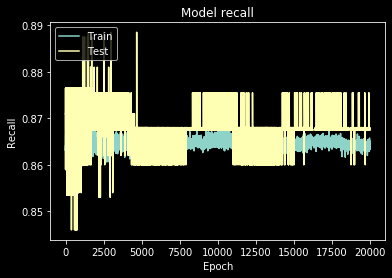

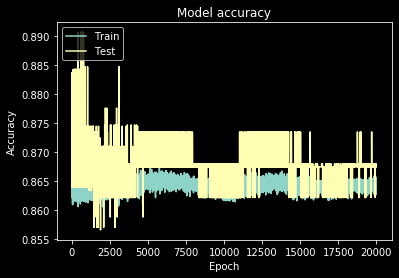

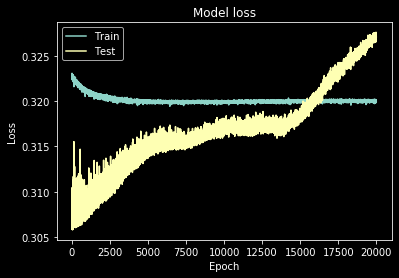

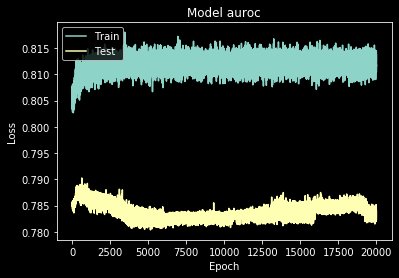

In [193]:
recall_plot(history)
precision_plot(history)
loss_plot(history)
auroc_plot(history)